# 성범죄 보도에서 피해자와 여성은 어떻게 다뤄지는가?

## 빈도 분석 및 기술통계

연구자들은 한국 ABC협회의 일 평균 유료부수 순위를 기준으로 상위 5위에 해당하는 종합일간지(조선일보, 동아일보, 중앙일보, 한겨레, 경향)와 같은 순위에서 6, 7위에 위치한 경제신문 둘(매일경제, 한국경제), 그리고 공중파 방송사 세 곳(KBS, SBS, MBC)을 포함한 총 열 곳의 언론사에서 2002년 1월 1일부터 2018년 6월 15일까지 내놓은 성범죄와 관련된 기사를 해당 언론사의 공식 홈페이지에서 수집하였다. 단 MBC의 경우 '성폭행'과 '강간'등의 키워드에 대한 뉴스 검색이 불가능한 관계로 해당 언론사의 기사를 제공하는 포털 사이트 다음의 뉴스 검색을 함께 활용하였으며, SBS 역시 2011년 이전의 자사 뉴스 기사를 제공하지 않았기 때문에 같은 포털 사이트의 뉴스 검색을 통해 기사를 수집하였다. 검색 과정에서는 '강간'과 '성희롱', '성폭행', '성추행', '성범죄', '성폭력'의 여섯 단어를 검색어로 활용하였다.

이 과정에서 수집된 기사는 총 15만 6천건이나, 이 가운데 중복된 기사를 제거하고 기사의 전반적인 내용이 성범죄와 아무런 관련이 없는 것으로 판단되는 기사를 모두 제거한 결과 총 10만 6346건의 기사를 활용하여 분석을 진행하게 되었다. 분석에 사용된 언론사 기사의 숫자는 각각 다음과 같다.

In [89]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib

#matplotlib의 글자가 꺠지지 않게 하기 위해 matplotlib의 폰트를 바꾸어줌
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:\\Windows\\Fonts\\malgun.ttf").get_name()
rc('font', family=font_name)
flist = matplotlib.font_manager.get_fontconfig_fonts()

import sys
import csv
import pandas as pd

csv.field_size_limit(100000000)
data = pd.read_csv('processed_2002.csv', encoding='utf8', engine='python').dropna(subset=['pos'])

In [187]:
data.press = data.press.astype('category')
pd.DataFrame(data.press.value_counts()).transpose()

,KBS,SBS,경향신문,중앙일보,MBC,매일경제,동아일보,조선일보,한겨레,한국경제
press,25187,14408,13938,11443,10983,8732,7953,5826,4929,2775


#### 연도별 기사 숫자

![sexual](https://github.com/ChangdongOh/mediaframe_sexualviolence/blob/master/images/sexualharassment.png?raw=true)
![crimes](https://github.com/ChangdongOh/mediaframe_sexualviolence/blob/master/images/crime.png?raw=true)

성범죄 관련 보도 기사의 숫자는 해마다 빠르게 상승하고 있다. 범죄 일반에 대한 10개 언론사의 기사 숫자를 함께 살펴본 결과 성범죄 기사가 여타 범죄에 비해 유달리 더 많은 주목을 받고 있다고 보긴 어려우나, 한 해의 절반(6월)만이 지난 2018년 한 해로 한정해서 볼 때 매우 가파른 상승폭을 보이고 있다는 점에 주목할 필요가 있다. 범죄 일반 기사가 작년의 절반 수준인 것에 비해, 성범죄 관련 보도의 경우 6월까지의 기사만으로도 2017년 한 해 보도된 기사 개수를 뛰어넘는다. 이는 미투 운동이나 페미니즘 등 성폭력 사건에 대한 대중들의 관심과 호응을 불러일으킬만한 이슈와 담론 지형 변동이 있었기에 나타난 결과로 보인다. 

## 전처리

성범죄 보도 기사의 경우 유명인을 제외하면 가해자와 피해자 모두 익명으로 처리되는 것이 일반적이며, 기사에서 언급된 개개인들은 '김모 씨', 'A양', 'ㄱ군' 등으로 지칭된다. 연구자들은 기사에서 피해자와 가해자, 남성과 여성을 프레이밍하는 과정을 판단하기 위해서는 이러한 익명화된 형태의 피해자 및 가해자에 대한 지칭까지 포함할 필요가 있다고 판단하였다. 이를 위해 전처리 과정에서 한글 성씨나 알파벳 및 자음 등으로 표현된 익명 표현들을 모두 '김'으로 통일하였다. 모든 기사에서 언급된 익명 표현들은 '김씨'나 '김양', '김군'과 같은 형태로 바뀌게 된다. 다만 '문재인 대통령'을 '문 대통령'이라 줄여 부르는 것처럼, 유명인의 실명을 언급한 이후 성과 직함으로 부르는 경우가 있는데 이러한 경우는 익명화된 피해자-가해자 지칭과는 거리가 있다고 판단하여 별도의 재코딩 과정을 거치지 않고 그대로 분석에 사용하였다.

자연어 처리 연구에서는 기사의 단어들에서 의미만을 추출해내기 위한 형태소 분석기가 필요하다. 본 연구는 파이썬의 자연어 처리 패키지인 [KoNLPy](http://konlpy.org/en/v0.4.4/) (박은정, 조성준 2014)에 내장된 [코모란 형태소 분석기](https://github.com/shin285/KOMORAN)를 활용하여 형태소 단위로 텍스트를 분리하였다. 이 과정에서 명사, 형용사, 동사 및 관형사를 제외한 다른 품사(part of speech)들은 모두 제거하였다. 그 외에도 형태소 분석기의 정확도 문제로 인해 제대로 분류되지 않거나 고유명사로 취급되지 않는 몇몇 표현들을 수정하고 의미 없는 단어들을 불용어(stopwords)로 지우는 과정을 거쳤다. 자세한 전처리 과정과 여기에 사용된 코드는 다음 [링크](https://github.com/ChangdongOh/mediaframe_sexualviolence/blob/master/preprocessing.ipynb)에 업로드되어 있다. 성범죄 관련 기사의 문장 하나를 형태소 분석기로 실제로 분석한 결과는 다음과 같다.

In [190]:
from konlpy.tag import Komoran
pos_tagger = Komoran()
print(data.article[10000].split(r'.')[1])

　18일 대구 소재 모 육군 부대에 따르면 분대장 이모(20) 상병은 지난해 7월부터 올 1월까지 같은 내무반에서 생활하는 A이병(20) 등 후임병 14명을 성추행했다


In [191]:
print(['/'.join(i) for i in pos_tagger.pos(data.article[10000].split(r'.')[1])])

['\u3000/SH', '18/SN', '일/NNB', '대구/NNP', '소재/NNG', '모/MM', '육군/NNG', '부대/NNG', '에/JKB', '따르/VV', '면/EC', '분대장/NNG', '이모/NNG', '(/SS', '20/SN', ')/SS', '상병/NNG', '은/JX', '지난해/NNG', '7/SN', '월/NNB', '부터/JX', '올/MM', '1/SN', '월/NNB', '까지/JX', '같/VA', '은/ETM', '내무반/NNG', '에서/JKB', '생활/NNG', '하/XSV', '는/ETM', 'A/SL', '이병/NNG', '(/SS', '20/SN', ')/SS', '등/NNB', '후임/NNG', '병/NNG', '14/SN', '명/NNB', '을/JKO', '성추행/NNG', '하/XSV', '았/EP', '다/EC']


위와 같은 전처리 과정을 거친 뒤 만들어진 말뭉치(corpus)에서 가장 많이 등장한 단어 50건은 다음과 같았다.

In [122]:
import nltk
from nltk import FreqDist

tokens = [j for i in data['pos'] for j in i.split(' ')]
text = nltk.Text(tokens)
freq = FreqDist(text)
fdic = {i[0]:i[1] for i in freq.most_common(100)}
pd.DataFrame.from_dict(fdic, orient='index').to_csv('freq.csv', encoding='utf-8')

In [11]:
#sorted(freq.items(), key=lambda item: item[1], reverse=True)

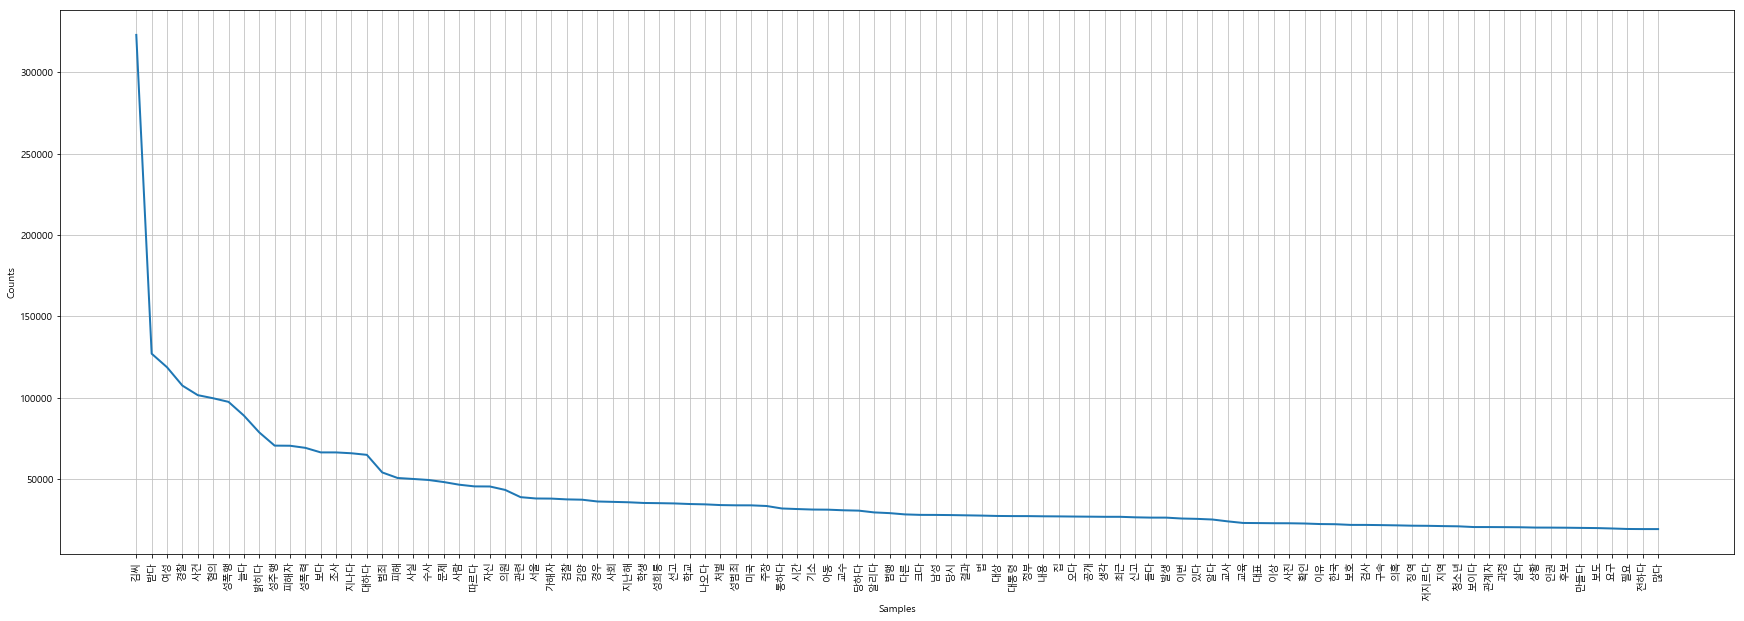

In [6]:
from matplotlib import font_manager, rc 
font_fname = 'c:/windows/fonts/malgun.ttf' # A font of your choice 
font_name = font_manager.FontProperties(fname=font_fname).get_name() 
rc('font', family=font_name)

import matplotlib.pyplot as plt

fig = plt.figure()
plt.figure(figsize=(30, 10)) 
text.plot(100)

앞서 언급한 것과 같은 익명화 과정을 거친 결과 '김씨'라는 단어가 가장 많이 등장하였다. 그 외에도 사건을 묘사하는 서술어들과 수사 및 법정에서 사용되는 용어들, 피해자와 가해자를 묘사하기 위한 다양한 어휘들이 등장하고 있으며, 단어 분포의 구조는 전형적인 멱함수 분포(power function distribution)의 형태를 띠고 있다.

 분석 방법
=====================================

### Structural Topic Model

연구자들은 이렇게 수집한 대용량 텍스트 데이터를 분석하고 비정형 데이터가 가진 몇몇 문제점을 극복하기 위해 과정에서 최근 주목받고 있는 두 가지 텍스트 마이닝 알고리즘을 사용하고자 했다. 첫 번째로 사용한 방법론은 구조적 토픽 모델(Structural Topic Model)이다. Roberts, Steward와 Tingley(2017)이 제시한 이 알고리즘은 기존에 텍스트 마이닝 연구에서 널리 쓰여 왔던 Latent Dirichlet Allocation 기반의 토픽 모델(Blei, Ng and Jordan 2003)을  개량한 것이다. 토픽 모델은 대용량의 비정형 말뭉치(corpus)에서 별도의 코딩이나 사전적 정보 없이도 패턴을 파악할 수 있는 강력한 군집화 알고리즘으로 각광받아 왔다. 해당 논문에서 소개된 학술 논문 이외에도 토픽 모델은 여러 언론 보도 자료를 활용한 연구(Newman and Block 2006; DiMaggio, Nag and Blei 2013) 텍스트 내부의 주제와 이슈를 파악하고 쉽게 요약할 수 있음을 입증하였으며, 소셜 미디어와 전통적 언론과 같이 여러 출처에서 수집한 데이터를 가지고서도 효과적인 비교를 수행할 수 있다(Zhao et al. 2011). 

본 연구가 사용한 구조적 토픽 모형은 이러한 기존의 토픽 모델에 시간이나 글의 작성자, 성향과 같은 메타데이터를 쉽게 결합할 수 있도록 개량된 알고리즘이며, 이러한 강점으로 인해 정치학 등 사회과학 분야 전반에서 언론이나 사회 운동, 정치인이나 정당을 분석하기 위한 도구로 널리 사용되고 있다(Grimmer and Stewart 2011; Bail, Brown and Mann 2017).

토픽 모델은 분석 대상인 문서들이 일정한 '토픽'이 확률적으로 모여 형성되었다고 가정하며, 문서의 형태소들을 군집화해서 그러한 토픽을 찾아준다. 여기서 토픽들 역시 일정한 단어들이 확률적으로 모여 이뤄졌다는 전제를 갖고 있다. 토픽 모델이 제시하는 단어의 집합은 모델의 통계적 설명력에 따라 달라질 수 있지만, 대체로 연구자가 글을 쓰고 읽을 때 생각하는 일정한 프레임과 부합하는 경우가 많다. 예를 들어 본 연구에서 사용한 토픽 모델의 1번 토픽은 전체 문서에서 1.02% 정도의 비율을 차지하며, 다음 단어들로 구성되어 있다.

글 + 올리다 + 인터넷 + 사진 + 온라인 + 네티즌 + 페이스북 + 청원 + 댓글 + ....

연구자는 이러한 단어의 집합을 보면서 1번 토픽이 성범죄 사건에 대해 네티즌들이 인터넷에 올린 글과 댓글 반응에 대한 토픽임을 쉽게 인지할 수 있을 것이다. 물론 모든 글은 하나의 토픽만으로 이뤄지는 것이 아니라 여러 토픽의 결합을 통해 쓰여진다. 연구자는 연구 대상이 된 문서가 각각 어떤 토픽들이 어느 정도의 비율로 합해져 만들어졌는지 추적할 수 있으며, 이를 바탕으로 그 문서가 발행된 연도나 작성한 언론사 등의 정보를 활용하여 각각의 언론사와 시기에 어떤 종류의 이슈와 주제가 높은 비중을 차지했는지 추적할 수 있다.

이러한 토픽 모델의 추정 과정에서 연구자는 전체 문서를 요약하기에 적합한 토픽 숫자를 결정해야 한다. 토픽 숫자를 결정하는 데에는 아직까지 합의된 수학적, 통계적 기준이 존재하는 것은 아니지만 본 연구에서는 Mimno 등(2011)이 제시한 semantic coherence에 기반한 추정 방법을 사용하였다. 이를 통해 도출한 토픽 숫자는 95개였으며, 95개의 토픽을 하나하나 모두 살펴보고 추적하는 것은 불가능하다. 따라서 본 연구는 관련 분야의 기존 연구들과 여성가족부 및 기자협회가 발행한 성폭력 보도 가이드라인을 바탕으로 설정한 분류 체계에 맞춰서 다시 재배치하는 방법을 선택하였다. 토픽의 분류 체계는 다음과 같다.

#### 성범죄 사건에 대한 토픽: 선정성과 동정심, 그리고 객관성
> 사건에 대한 선정적, 자극적 묘사 / 피해자에 대한 동정심을 유발하는 내러티브 / 사건 및 조사, 판결에 대한 객관적 사실관계

#### 성범죄 대책과 반응에 대한 토픽: 구조와 처벌, 성범죄 대책의 목적
> 가해자에 대한 분노 섞인 반응에 기반한 엄벌주의와 처벌 기반의 대책 / 치안 정책이나 사회 구조를 중심으로 피해자를 보호하기 위한 대책

#### 범행 동기와 가해자-피해자 사이의 관계에 대한 토픽: 정신병과 충동, 면식범과 지속적 범죄, 연인간의 성폭력
> 충동에 사로잡힌 정신질환 환자 / 계획적이고 상습적으로 범죄를 저지른 면식범 / 가까운 파트너에 대한 폭력(Intimate Partner Violence)

#### 성범죄가 일어난 공간 및 배경을 묘사하는 토픽
> 가해자와 피해자 모두 익명이 일반적인 보도: 학교 / 직장, 군대, 경찰 등의 조직 / 전문가-고학력 집단 / 공공 장소

> 유명인의 실명을 인용하는 보도: 정치인 / 문화-예술 / 연예-스포츠 / 해외 소식

구체적인 구조적 토픽 모델 분석 결과와 재분류 결과는 다음 [파일](https://github.com/ChangdongOh/mediaframe_sexualviolence/blob/master/Topics_Tagged.csv)에 모두 정리되어 있다.

## Word Embedding

연구자들은 이러한 토픽 모델을 전체적인 말뭉치의 구조와 구성을 파악하기 위한 용도로 사용하면서 이를 보완하기 위한 방법론으로 단어 임베딩 알고리즘(Word Embedding, Word2Vec)을 사용하였다. 이는 구체적인 어휘와 단어의 사용 목적을 파악하기 용이하며, 젠더 및 소수자에 대한 편견을 찾아내기 위한 연구 분야에서는 마이크로소프트의 엔지니어들이 중심이 되어 발표한 논문(Bolukbasi et al. 2016)과 젠더 스테레오타입의 100년간 변화를 조망한 연구(Garg et al. 2018)에서 성공적으로 활용된 바 있다. 단어 임베딩 모델은 뉴럴 네트워크를 활용해 단어들을 일정 차원의 벡터 공간에 투영하는데, 이 과정에서 단어의 의미가 벡터의 형태로 효과적으로 표현될 수 있다. 예를 들어서 다음과 같은 예시는 단어 임베딩을 통해 젠더간 의미 차이가 성공적으로 드러날 수 있음을 보여준다.

\begin{align}
\vec{King} + \vec{Woman} - \vec{Man} & = \vec{Queen}
\end{align}

![kingqueen](https://cdn-images-1.medium.com/max/638/1*Bjtqi5sgc-pE8bB80IAkeA.jpeg)

본 연구에서는 이러한 Word2Vec을 '여성'이나 '피해자'와 같은 중요한 의미를 가진 키워드와 유사한 단어를 찾아내는 데에 활용하는 한편, 위에 언급된 것과 같은 단어 연산을 사용하여 의미를 추출해내는 데에도 사용할 것이다. 예를 들어서 앞서 전처리 과정에서 익명의 개인을 지칭할 때 사용하는 '김모 씨'와 같은 단어의 경우, 연구자가 문서를 직접 살펴보며 하나하나 코딩을 하지 않는 이상 자체만으로는 해당 단어가 피해자와 가해자, 남성과 여성 가운데 어느 쪽을 지칭하는지 판단할 길이 없다. 그러나 단어 임베딩을 결합하면 이러한 난점을 쉽게 해결할 수 있다. 예를 들어서 익명의 개인 김씨 가운데 '남성'이 아닌 '여성'만을 살펴보고 싶다면 어떻게 하면 될까? '왕'에서 여성을 더하고 남성을 뺐던 위의 연산 과정을 살펴보자.

\begin{align}
\vec{Kim} + \vec{Woman} - \vec{Man} & = ??
\end{align}

위와 같이 '김씨'에서 여성을 더하고, 남성을 빼는 연산을 수행하면 된다. 훈련된 단어 임베딩 모델에 대해서 연산을 수행했을 때 가장 가까운 단어들 30개를 살펴보면 노래방이나 커피숍과 같은 성범죄와 관련된 장소와 여성을 지칭하는 김양, 여자친구, 여종업원, 아내 등의 표현이 높은 비율로 등장하는 것을 알 수 있다.

In [194]:
print([(i[0], round(i[1], 2)) for i in model.most_similar(['김씨', '피해자'], ['가해자'], topn=30)])

[('김양', 0.35), ('시아버지', 0.24), ('여직원', 0.24), ('언니', 0.24), ('아내', 0.23), ('처제', 0.23), ('판시', 0.22), ('고씨', 0.22), ('의붓딸', 0.22), ('친아버지', 0.21), ('노래방', 0.21), ('큰딸', 0.21), ('여자친구', 0.21), ('원고', 0.21), ('조카', 0.2), ('담임교사', 0.2), ('동거녀', 0.2), ('이수', 0.2), ('재판부', 0.2), ('차례', 0.2), ('유흥주점', 0.19), ('시각장애인', 0.19), ('데려가다', 0.19), ('수원지법', 0.19), ('피해', 0.18), ('입사', 0.18), ('그해', 0.18), ('여종업원', 0.18), ('간호사', 0.18), ('지인', 0.18)]


In [13]:
from gensim.models.word2vec import Word2Vec
model = Word2Vec.load('standard.model')
model.most_similar(['김씨', '피해자'], ['가해자'], topn=30)

[('김양', 0.34736716747283936),
 ('시아버지', 0.2402135729789734),
 ('여직원', 0.23885682225227356),
 ('언니', 0.23747104406356812),
 ('아내', 0.23491710424423218),
 ('처제', 0.23059681057929993),
 ('판시', 0.22355856001377106),
 ('고씨', 0.22102978825569153),
 ('의붓딸', 0.21701925992965698),
 ('친아버지', 0.2122514396905899),
 ('노래방', 0.2088909149169922),
 ('큰딸', 0.20814256370067596),
 ('여자친구', 0.20765092968940735),
 ('원고', 0.20758715271949768),
 ('조카', 0.20469233393669128),
 ('담임교사', 0.20100536942481995),
 ('동거녀', 0.19624246656894684),
 ('이수', 0.1957029104232788),
 ('재판부', 0.1955297887325287),
 ('차례', 0.19513073563575745),
 ('유흥주점', 0.19229117035865784),
 ('시각장애인', 0.19010739028453827),
 ('데려가다', 0.18533018231391907),
 ('수원지법', 0.18509185314178467),
 ('피해', 0.1849450021982193),
 ('입사', 0.18480491638183594),
 ('그해', 0.18373331427574158),
 ('여종업원', 0.18287025392055511),
 ('간호사', 0.18083104491233826),
 ('지인', 0.18003350496292114)]

연구자들은 Garg 등(2018)의 연구에서 사용된 이러한 단어 임베딩 기법을 바탕으로 한국 언론의 보도에서 드러난 피해자 및 가해자, 그리고 여성이 어떠한 개념 및 어휘와 연관되어 서술되었는지 살펴보고 이를 비판적으로 바라보는 작업을 수행하였다. 동시에 이러한 Word2Vec 분석을 같은 데이터로 훈련시킨 구조적 토픽 모델 분석 결과와 함께 살펴보면서 언론의 보도 프레임과 피해자-가해자 프레이밍 성향이 어떻게 변해왔는지 추적하고자 했다.

분석 결과
==============================================================

## 여자와 남자, 피해자와 가해자의 의미

연구자들은 구체적인 미디어 프레임에 대한 분석에 들어가기에 앞서 기사에서 언급된 주요 행위자라 할 수 있는 여성과 남성, 피해자와 가해자라는 단어가 각기 어떤 단어와 함께 결합되었는지를 살펴보았다. 아래의 분석 결과는 '여성'을 나타내는 주요 단어 3개(여자, 여성, 김양)와 같은 단어의 남성형 3개(남자, 남성, 김군), 그리고 피해자와 가해자와 밀접한 30개 단어를 나열하고 시각화한 것이다.

여자는 객체이자 성욕의 대상으로서 호명되며, 동사나 형용사적 표현들이 중심이 된다. 반면 여성은 사회적으로 부과되는 직업이나 가족 구성원으로서의 역할이 더욱 두드러지는 경향이 있다. 이러한 모습은 '김양'에서 더욱 극대화되는데, 미성년 여성을 지칭할 때 여성은 그의 가족 관계(큰딸, 여동생, 언니, 딸, 남동생)를 중심으로 서술되고 있다. 

남성을 지칭하는 표현 '남자'의 경우 위에 언급된 '여자'라는 단어와 결부되어 그러한 성욕의 대상으로서 여성에게 행위를 가하는 형태로 언급된다. '남성' 역시 이와 유사하게 성적 범죄의 목표물이 되는 단어와 함께 자주 등장했던 것으로 보인다. '김군'이라는 학생 나이대의 미성년 남성을 지칭하는 단어의 경우 '김양'과는 달리 가족보다도 학교에서의 교사 및 동급생들과의 관계가 중심이 된다는 점에서 여성과 사뭇 다른 패턴이 나타났다.

In [5]:
df = pd.DataFrame()
df['여자'] = [(i[0], round(i[1], 2)) for i in model.most_similar('여자', topn=30)][0:30]
df['여성'] = [(i[0], round(i[1], 2)) for i in model.most_similar('여성', topn=30)][0:30]
df['김양'] = [(i[0], round(i[1], 2)) for i in model.most_similar('김양', topn=30)][0:30]
df['남자'] = [(i[0], round(i[1], 2)) for i in model.most_similar('남자', topn=30)][0:30]
df['남성'] = [(i[0], round(i[1], 2)) for i in model.most_similar('남성', topn=30)][0:30]
df['김군'] = [(i[0], round(i[1], 2)) for i in model.most_similar('김군', topn=30)][0:30]
df['피해자'] = [(i[0], round(i[1], 2)) for i in model.most_similar('피해자', topn=30)][0:30]
df['가해자'] = [(i[0], round(i[1], 2)) for i in model.most_similar('가해자', topn=30)][0:30]
df

,여자,여성,김양,남자,남성,김군,피해자,가해자
0,"(남자, 0.53)","(여자, 0.33)","(김군, 0.51)","(여자, 0.53)","(남자, 0.45)","(김양, 0.51)","(피해, 0.42)","(범인, 0.5)"
1,"(여자애, 0.52)","(남성, 0.32)","(여동생, 0.35)","(여자애, 0.47)","(기혼, 0.35)","(동급생, 0.45)","(생존자, 0.33)","(혐의자, 0.42)"
2,"(여자아이, 0.46)","(여직원, 0.31)","(여학생, 0.34)","(남성, 0.45)","(중년, 0.33)","(중퇴, 0.43)","(당사자, 0.33)","(가해, 0.35)"
3,"(나쁜, 0.37)","(여경, 0.3)","(여중생, 0.34)","(창녀, 0.4)","(백인, 0.33)","(담임교사, 0.39)","(희생자, 0.33)","(행위자, 0.33)"
4,"(처녀, 0.34)","(여대생, 0.29)","(용인시, 0.34)","(여자아이, 0.39)","(트랜스젠더, 0.32)","(옥상, 0.38)","(가해, 0.3)","(신고자, 0.31)"
5,"(여성, 0.33)","(여군, 0.29)","(딸, 0.34)","(처녀, 0.39)","(여성, 0.32)","(중학생, 0.38)","(신고자, 0.29)","(가하다, 0.31)"
6,"(유부녀, 0.33)","(여학생, 0.27)","(딸아이, 0.34)","(예쁘다, 0.37)","(젊다, 0.31)","(고등학생, 0.36)","(피고인, 0.28)","(당사자, 0.31)"
7,"(아가씨, 0.33)","(여배우들, 0.27)","(여고생, 0.33)","(아저씨, 0.36)","(남학생, 0.31)","(고교생, 0.36)","(가하다, 0.25)","(공범, 0.3)"
8,"(놀리다, 0.32)","(남녀, 0.26)","(이혜진, 0.33)","(미모, 0.35)","(치한, 0.31)","(자퇴, 0.35)","(가해자, 0.24)","(목격자, 0.3)"
9,"(마담, 0.32)","(트랜스젠더, 0.26)","(동생, 0.33)","(유부남, 0.34)","(가부장제, 0.3)","(남매, 0.34)","(제보자, 0.24)","(범죄자, 0.29)"


In [24]:
model.most_similar(['피해자', '남성'], ['여성'], topn=20)

[('피해', 0.37404829263687134),
 ('피고인', 0.27862992882728577),
 ('상대방', 0.24292811751365662),
 ('가해자', 0.24197477102279663),
 ('이병', 0.2376750111579895),
 ('승객', 0.23551100492477417),
 ('자백', 0.22345343232154846),
 ('죄책감', 0.22335118055343628),
 ('선처', 0.22235393524169922),
 ('학우', 0.22069883346557617),
 ('소령', 0.21831345558166504),
 ('가해', 0.21528564393520355),
 ('상급자', 0.21358872950077057),
 ('소년범', 0.21305613219738007),
 ('김길태', 0.2100473940372467),
 ('엄하다', 0.2095407247543335),
 ('병장', 0.20862458646297455),
 ('면회', 0.2068297117948532),
 ('오빠', 0.2012632191181183),
 ('범인', 0.20106524229049683)]

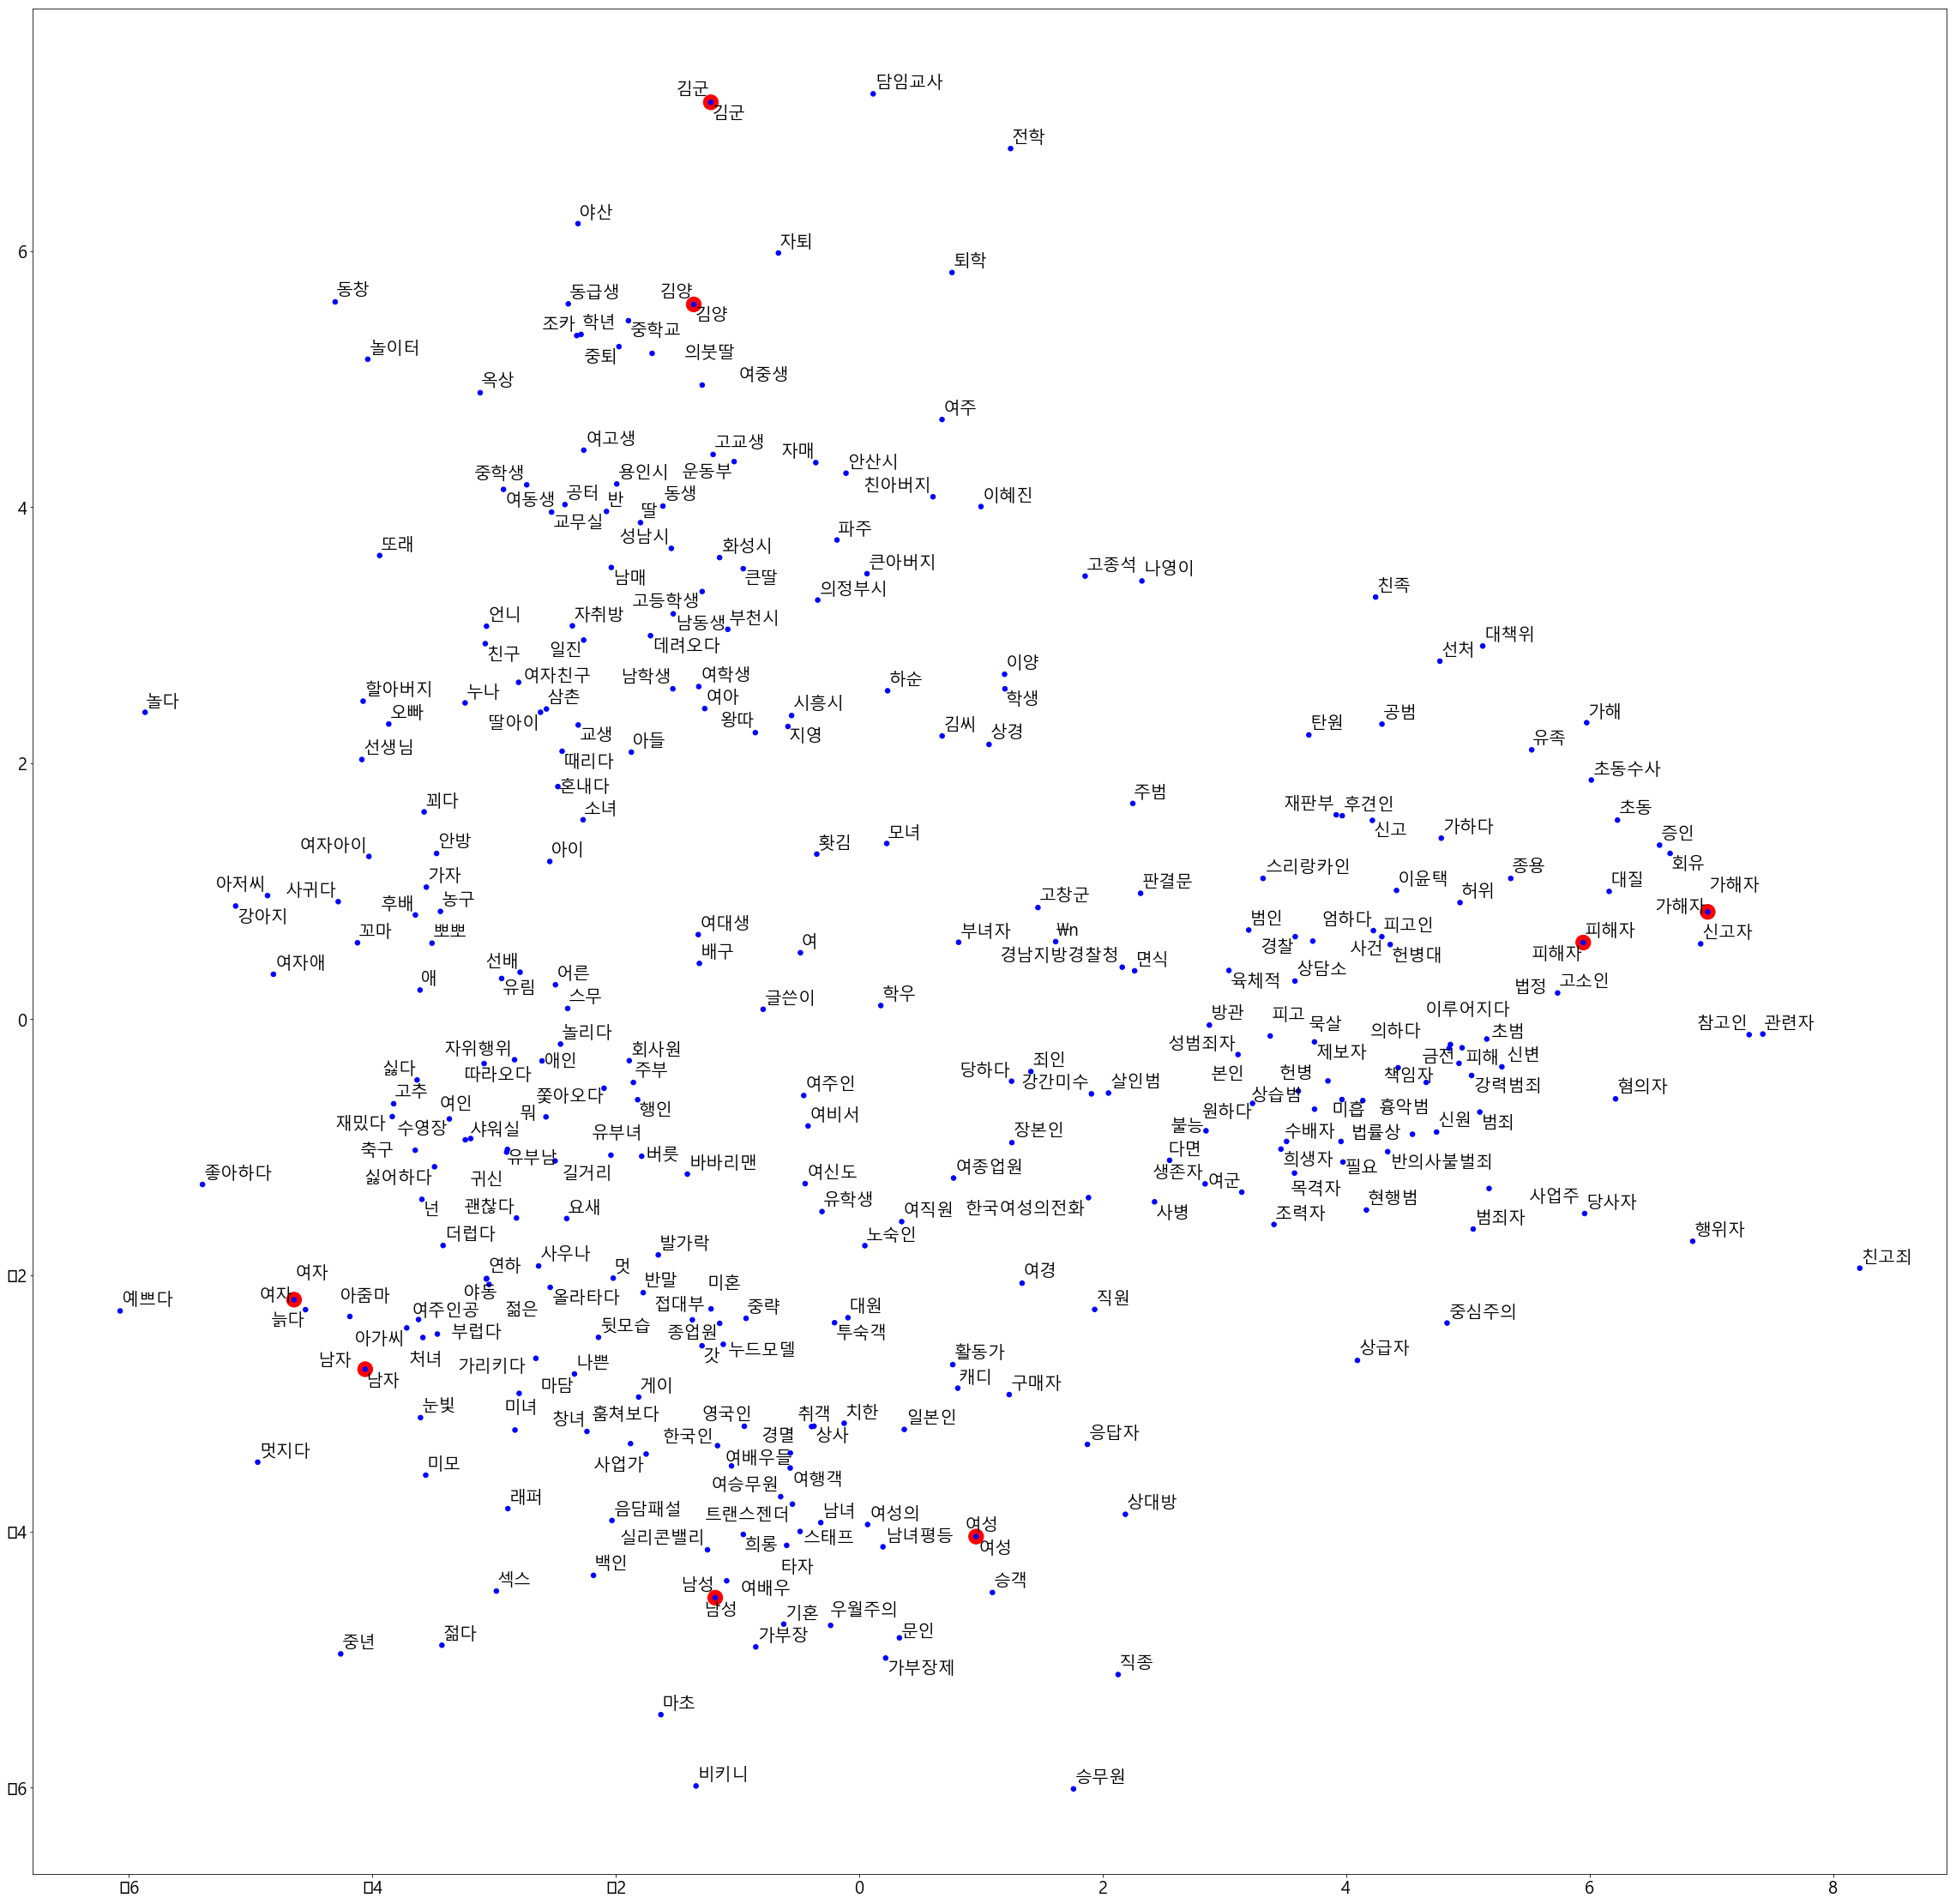

In [195]:
seed = ['김군', '김양', '여자', '여성', '남자', '남성', '피해자', '가해자']
words = list(set([j[0] for i in seed for j in model.most_similar(i, topn=50)] + seed))
windex = [words.index(i) for i in seed]
s = [30] * len(words)
c = ['blue'] * len(words)
for i in windex:
    s[i] = 300
    c[i] = 'red'
wordvecs = [model.wv.word_vec(i) for i in words]
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(wordvecs)
X = pca.transform(wordvecs)
xs = X[:, 0]
ys = X[:, 1]
plt.figure(figsize=(40,40))
plt.scatter(xs,ys, s=s, c=c)

from adjustText import adjust_text
rc('font',family=font_name, size=20)
texts = [plt.text(k, v, s) for k, v, s in zip(xs,ys,words)]
adjust_text(texts)
plt.savefig('landscape.jpeg')

'김씨'라는 젠더가 전제되지 않은 표현에서 여성을 더하고 남성을 뺄 때를 살펴봐도 이와 비슷한 패턴을 발견할 수 있다. 이 때 가장 먼저 나오는 것은 '여직원 김씨', '여대생 김씨'와 같은 그 사람의 직업과 '여자'임을 지칭하는 표현이다. 반면 남성을 더하고 여성을 뺄 때는 별도로 '남자'임을 지칭하는 표현보다는 피해자와의 관계('남자친구', '지인', '내연', '행인', '동료')와 범행 경위 등이 조금 더 자세히 드러난다.

In [25]:
df = pd.DataFrame()
df['여성'] = [i[0] for i in model.most_similar(['김씨', '여성'], ['남성'], topn=30)]
df['여성 유사도'] = [round(i[1], 2) for i in model.most_similar(['김씨', '여성'], ['남성'], topn=30)]
df['남성'] = [i[0] for i in model.most_similar(['김씨', '남성'], ['여성'], topn=30)]
df['남성 유사도'] = [round(i[1], 2) for i in model.most_similar(['김씨', '남성'], ['여성'], topn=30)]
df['여자'] = [i[0] for i in model.most_similar(['김씨', '여자'], ['남자'], topn=30)]
df['여자 유사도'] = [round(i[1], 2) for i in model.most_similar(['김씨', '여자'], ['남자'], topn=30)]
df['남자'] = [i[0] for i in model.most_similar(['김씨', '남자'], ['여자'], topn=30)]
df['남자 유사도'] = [round(i[1], 2) for i in model.most_similar(['김씨', '남자'], ['여자'], topn=30)]
df
df['피해자'] = [i[0] for i in model.most_similar(['김씨', '피해자'], ['가해자'], topn=30)]
df['피해자 유사도'] = [round(i[1], 2) for i in model.most_similar(['김씨', '피해자'], ['가해자'], topn=30)]
df['가해자'] = [i[0] for i in model.most_similar(['김씨', '가해자'], ['피해자'], topn=30)]
df['가해자 유사도'] = [round(i[1], 2) for i in model.most_similar(['김씨', '가해자'], ['피해자'], topn=30)]
df

,여성,여성 유사도,남성,남성 유사도,여자,여자 유사도,남자,남자 유사도,피해자,피해자 유사도,가해자,가해자 유사도
0,여직원,0.36,남자,0.30,김양,0.31,지인,0.28,김양,0.35,범인,0.35
1,여대생,0.24,회사원,0.28,여직원,0.30,일용직,0.27,시아버지,0.24,현행범,0.28
2,여,0.24,노래방,0.28,중순,0.28,큰딸,0.26,여직원,0.24,혐의,0.27
3,이튿날,0.23,남자친구,0.27,혐의,0.28,잠복,0.26,언니,0.24,주범,0.25
4,미용실,0.22,김군,0.26,여대생,0.27,남성,0.26,아내,0.23,공범,0.25
5,여주인,0.22,시경,0.26,명하다,0.25,동료,0.26,처제,0.23,무직,0.24
6,김양,0.22,김양,0.25,여주인,0.25,이튿날,0.26,판시,0.22,스리랑카인,0.24
7,명하다,0.22,혐의,0.25,청주시,0.24,노래방,0.25,고씨,0.22,광진구,0.24
8,중순,0.21,뿌리치다,0.25,지난달,0.24,내연,0.25,의붓딸,0.22,시경,0.24
9,여학생,0.21,찜질방,0.24,전주시,0.24,김군,0.25,친아버지,0.21,지난달,0.24


## 성범죄 사건의 전체적인 흐름과 의미

친족 -> 아동 -> '봉변'과 같은 완곡하고 보조적인 표현 -> 엄벌주의

비면식범 -> 아동이나 강력범죄 -> 선정적 보도, 가해자의 정신병, 피해자에 대한 동정심 -> 엄벌주의

공동체 -> 주로 성인 -> Victim Blaming -> 다만 배경(e.g. 술집 vs 캠퍼스)에 따라 달라짐, 특정 경우에는 -> 구조적 해책으로 이어짐


데이트??

W2V에서는 각각의 컨셉별로 씨앗 단어 2~3개 정도 정하고 그 씨앗 단어 30개 정도에 대해 주변의 단어 50개 나열하는 식으로.
동시에 토픽 모델 네트워크 분석 결과 제시

## 성범죄와 관련된 소식을 묘사하는 토픽

### 1) 선정적인 보도: 언론은 어떻게 가해자의 범행 수법을 재현하고 피해자를 대상화하는가?

성범죄 사건을 보도하는 과정에서 가해자의 범행 수법을 자세하게 묘사하고 피해자의 피해 상태 및 신체를 묘사하는 것은 모방 범죄의 가능성뿐만 아니라 피해자에 대한 2차 가해로 이어질 수 있다는 점에서 지양되어야 할 필요가 있다. 연구자들은 구조적 토픽 모델에서 도출한 토픽 가운데 다음 세 토픽이 이러한 '자극적/선정적 보도'의 범주에 해당한다고 보았다.

In [175]:
topics = pd.read_csv('Topics 95.csv')
topics[[i for i in topics.columns if bool(re.search('28|36|61|75', i)) and bool(re.search('Prob|FREX', i))]].loc[1:20,]

,28 Prob,28 FREX,36 Prob,36 FREX,61 Prob,61 FREX,75 Prob,75 FREX
1,범행,김길태,만지다,접촉,집,빼앗다,숨지다,숨지다
2,살인,사체,추행,허벅지,흉기,흉기,경찰,발견
3,시신,강호순,신체,추행,저지르다,훔치다,자살,유서
4,경찰,오원춘,접촉,신체,빼앗다,원룸,사망,유족
5,납치,실종,강제,더듬다,침입,주택가,목,게스트하우스
6,사건,시신,몸,성추행,위협,가정집,목숨,목숨
7,실종,암매장,강제추행,껴안다,경찰,현금,오후,자살
8,집,조르다,성적,부위,강도,혼자,지나다,찔리다
9,김길태,유기,가슴,가슴,살다,다방,끊다,제주
10,가해자,유영철,행위,어깨,들어가다,부녀자,오전,투신


28번 토픽은 성범죄와 함께 이뤄진 강력 범죄 사건에서 이뤄진 살해와 관련된 묘사들이 요약된 토픽이다. 해당 토픽은 가해자가 피해자를 살해하고 유기하였는지, 그리고 사체는 어떻게 처리하였는지 방법과 장소를 속속들이 서술하고 있다. 36번 토픽은 성희롱 및 성추행에 해당하는 범죄 양상을 묘사하고 있는데, 역시 피해자의 피해 신체 부위와 동새, 행위 등이 노골적으로 드러나 있다. 61번 토픽은 가택 침입과 연관된 성범죄 토픽으로, 침입과 강도 과정을 적나라하게 묘사하고 있을 뿐더러 피해 목표 대상과 함께 '발바리'와 같이 가해자의 성적 욕망을 드러내는 은어 역시 직접적으로 묘사되어 있다. 

#### '성추행' 및 '성희롱'에 해당하는 범죄가 주축인 36번만 따로 뺀다면 어떻게 될까? 특히 최근에 나오는 미투 폭로는 이쪽과 더 연관이 있다고 볼 수 있음.

In [172]:
df = pd.DataFrame()
df['만지다'] = [i[0] for i in model.most_similar(['만지다'], [], topn=30)]
df['허벅지'] = [i[0] for i in model.most_similar(['허벅지'], [], topn=30)]
df['시신'] = [i[0] for i in model.most_similar(['시신'], [], topn=30)]
df['김길태'] = [i[0] for i in model.most_similar(['김길태'], [], topn=30)]
df['침입'] = [i[0] for i in model.most_similar(['침입'], [], topn=30)]
df['빼앗다'] = [i[0] for i in model.most_similar(['빼앗다'], [], topn=30)]
df['사망'] = [i[0] for i in model.most_similar(['사망'], [], topn=30)]
df['숨지다'] = [i[0] for i in model.most_similar(['숨지다'], [], topn=30)]
df

,만지다,허벅지,시신,김길태,침입,빼앗다,사망,숨지다
0,더듬다,어깨,사체,고종석,다세대,뺏다,숨지다,사망
1,쓰다듬다,엉덩이,시체,김점덕,잠자다,강탈,사망자,주검
2,비비다,옆구리,주검,김수철,들어가다,훔치다,발병,쓰러지다
3,움켜쥐다,다리,물탱크,덕포동,들이닥치다,갈취,질식사,시신
4,주무르다,발가락,야산,사상경찰서,주거침입,빼앗기다,부상자,살해
5,가누다,무릎,비닐봉지,강호순,집주인,뜯어내다,사인,중상
6,밀착,가슴,밭,연쇄살인,베란다,뜯다,화재,피살
7,끌어안다,허리,숨지다,프로파일러,호프,인출,사상자,골절
8,손등,몸,암매장,사상구,창문,가로채다,침몰,질식사
9,껴안다,손등,비닐,정남규,강탈,돌려받다,골절,둔기


97

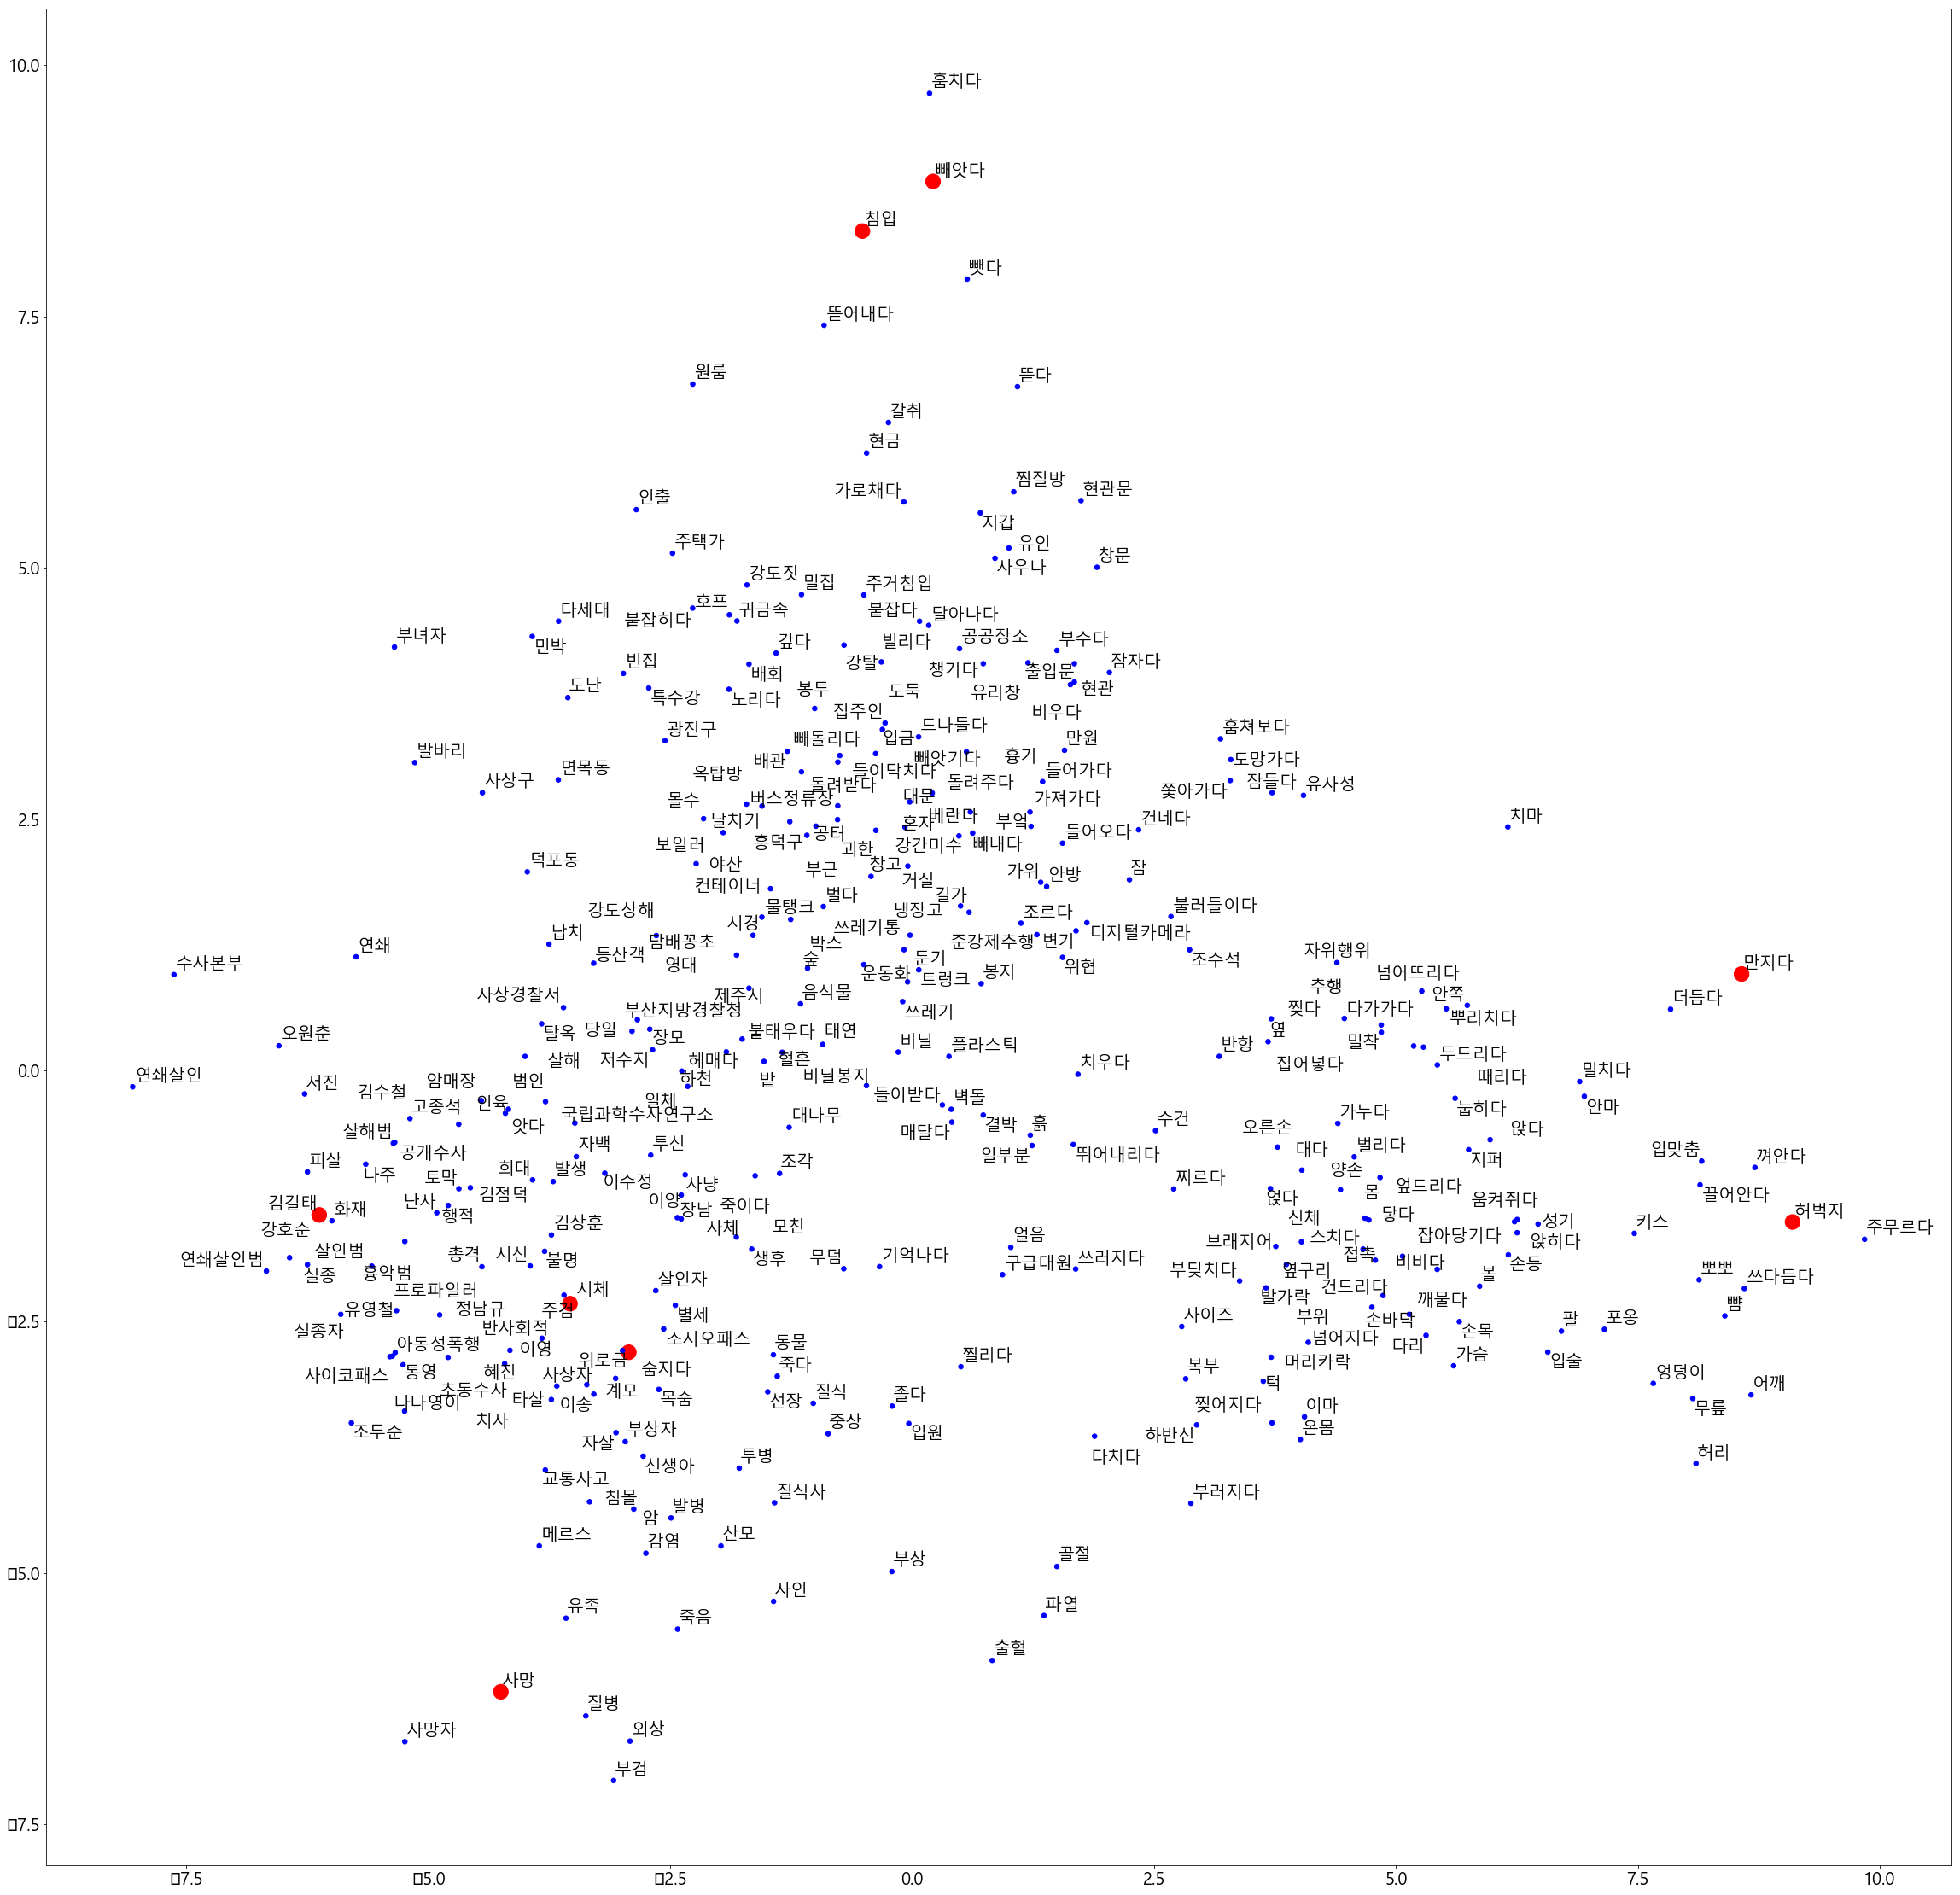

In [180]:
seed = ['시체', '김길태', '만지다', '허벅지', '침입', '빼앗다', '사망', '숨지다']
words = list(set([j[0] for i in seed for j in model.most_similar(i, topn=50)] + seed))
windex = [words.index(i) for i in seed]
s = [30] * len(words)
c = ['blue'] * len(words)
for i in windex:
    s[i] = 300
    c[i] = 'red'
wordvecs = [model.wv.word_vec(i) for i in words]
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(wordvecs)
X = pca.transform(wordvecs)
xs = X[:, 0]
ys = X[:, 1]
plt.figure(figsize=(40,40))
plt.scatter(xs,ys, s=s, c=c)

from adjustText import adjust_text
rc('font',family=font_name, size=20)
texts = [plt.text(k, v, s) for k, v, s in zip(xs,ys,words)]
adjust_text(texts)

### 2) 피해자에 대한 내러티브와 동정

성범죄에 대한 묘사 과정에서는 범행 과정에서 피해자나 피해자 주변 인물, 그리고 피해자의 전후 사정 등을 보도하게 된다. 이러한 피해자를 둘러싼 내러티브는 그 자체로 피해자를 특정할 수 있는 개인 정보라는 점에서도 문제이지만, 그러한 내러티브를 바탕으로 독자가 피해자에 대한 가치판단을 할 수 있다는 점에서도 위험하다. 실제로 성폭력 사건 보도 가이드라인의 경우 이러한 피해자 내러티브가 '범죄 이전 피해자와 주변의 바르고 아름다웠던 모습'을 강조함으로써 피해자를 회복할 수 없는 상처를 입은 동정의 대상인 것처럼 비춰질 수 있다고 비판하고 있다. 게다가 이러한 서술은 모범적이고 바른 품행을 가진 피해자만이 동정과 연민의 대상이 될 수 있다는 편견을 재생산할 여지도 있다.

본 연구의 경우 이러한 피해자에 대한 내러티브에 해당하는 토픽으로 다음 두 토픽을 선정하였다.

In [177]:
topics[[i for i in topics.columns if bool(re.search('51|73', i)) and bool(re.search('Prob|FREX', i))]].loc[1:30,]

,51 Prob,51 FREX,73 Prob,73 FREX
1,김군,김군,어린이,어린이
2,부산,여중생,부모,변조
3,여중생,가출,사건,음성
4,친구,유인,어리다,어른
5,집,부산,초등학생,부모
6,유인,채팅,집,김수철
7,성매매,과,피해,어리다
8,알다,여고생,음성,나주
9,만나다,사상구,당하다,아저씨
10,가출,친구,여자,고종석


위의 두 토픽은 피해자에 대한 내러티브가 각기 다른 방향으로 작동하는 대표적인 예시라 할 수 있다. 51번 토픽이 여중-여고생 피해자들에 대한 성범죄 과정에서 이뤄진 가출과 성매매, 원조교제나 만남 등을 구체적으로 묘사하면서 피해자에 대한 부정적 편견을 강화한다면, 73번 토픽의 경우 김수철, 고종석 사건 등에서 피해자가 되었던 어린이들의 주변 가족과 이웃들을 묘사하고 인터뷰까지 덧붙임으로써 피해자에 대한 동정적 시선을 형성하고 있다. 

In [179]:
df = pd.DataFrame()
df['친구'] = [i[0] for i in model.most_similar(['친구'], [], topn=30)]
df['유인'] = [i[0] for i in model.most_similar(['유인'], [], topn=30)]
df['채팅'] = [i[0] for i in model.most_similar(['채팅'], [], topn=30)]
df['부모'] = [i[0] for i in model.most_similar(['부모'], [], topn=30)]
df['어리다'] = [i[0] for i in model.most_similar(['어리다'], [], topn=30)]
df['이웃'] = [i[0] for i in model.most_similar(['이웃'], [], topn=30)]
df

,친구,유인,채팅,부모,어리다,이웃
0,동창,꾀다,메신저,부모님,젊은,동네
1,사귀다,데려가다,애플리케이션,어머니,학창,옆집
2,동급생,불러내다,대화방,엄마,사춘기,마을
3,친하다,속이다,동호회,아버지,어린아이,친척
4,남자친구,환심,카페,학부모,초등학생,이웃집
5,자취방,데려오다,꾀다,양부모,아이,할아버지
6,또래,데리다,나이트클럽,가족,유아,사촌
7,지인,가자,데이팅,양육,어린이,형제
8,놀다,불러들이다,만남,어른,미성년,주위
9,여자친구,숙박업소,사이트,자녀,이웃집,불우


97

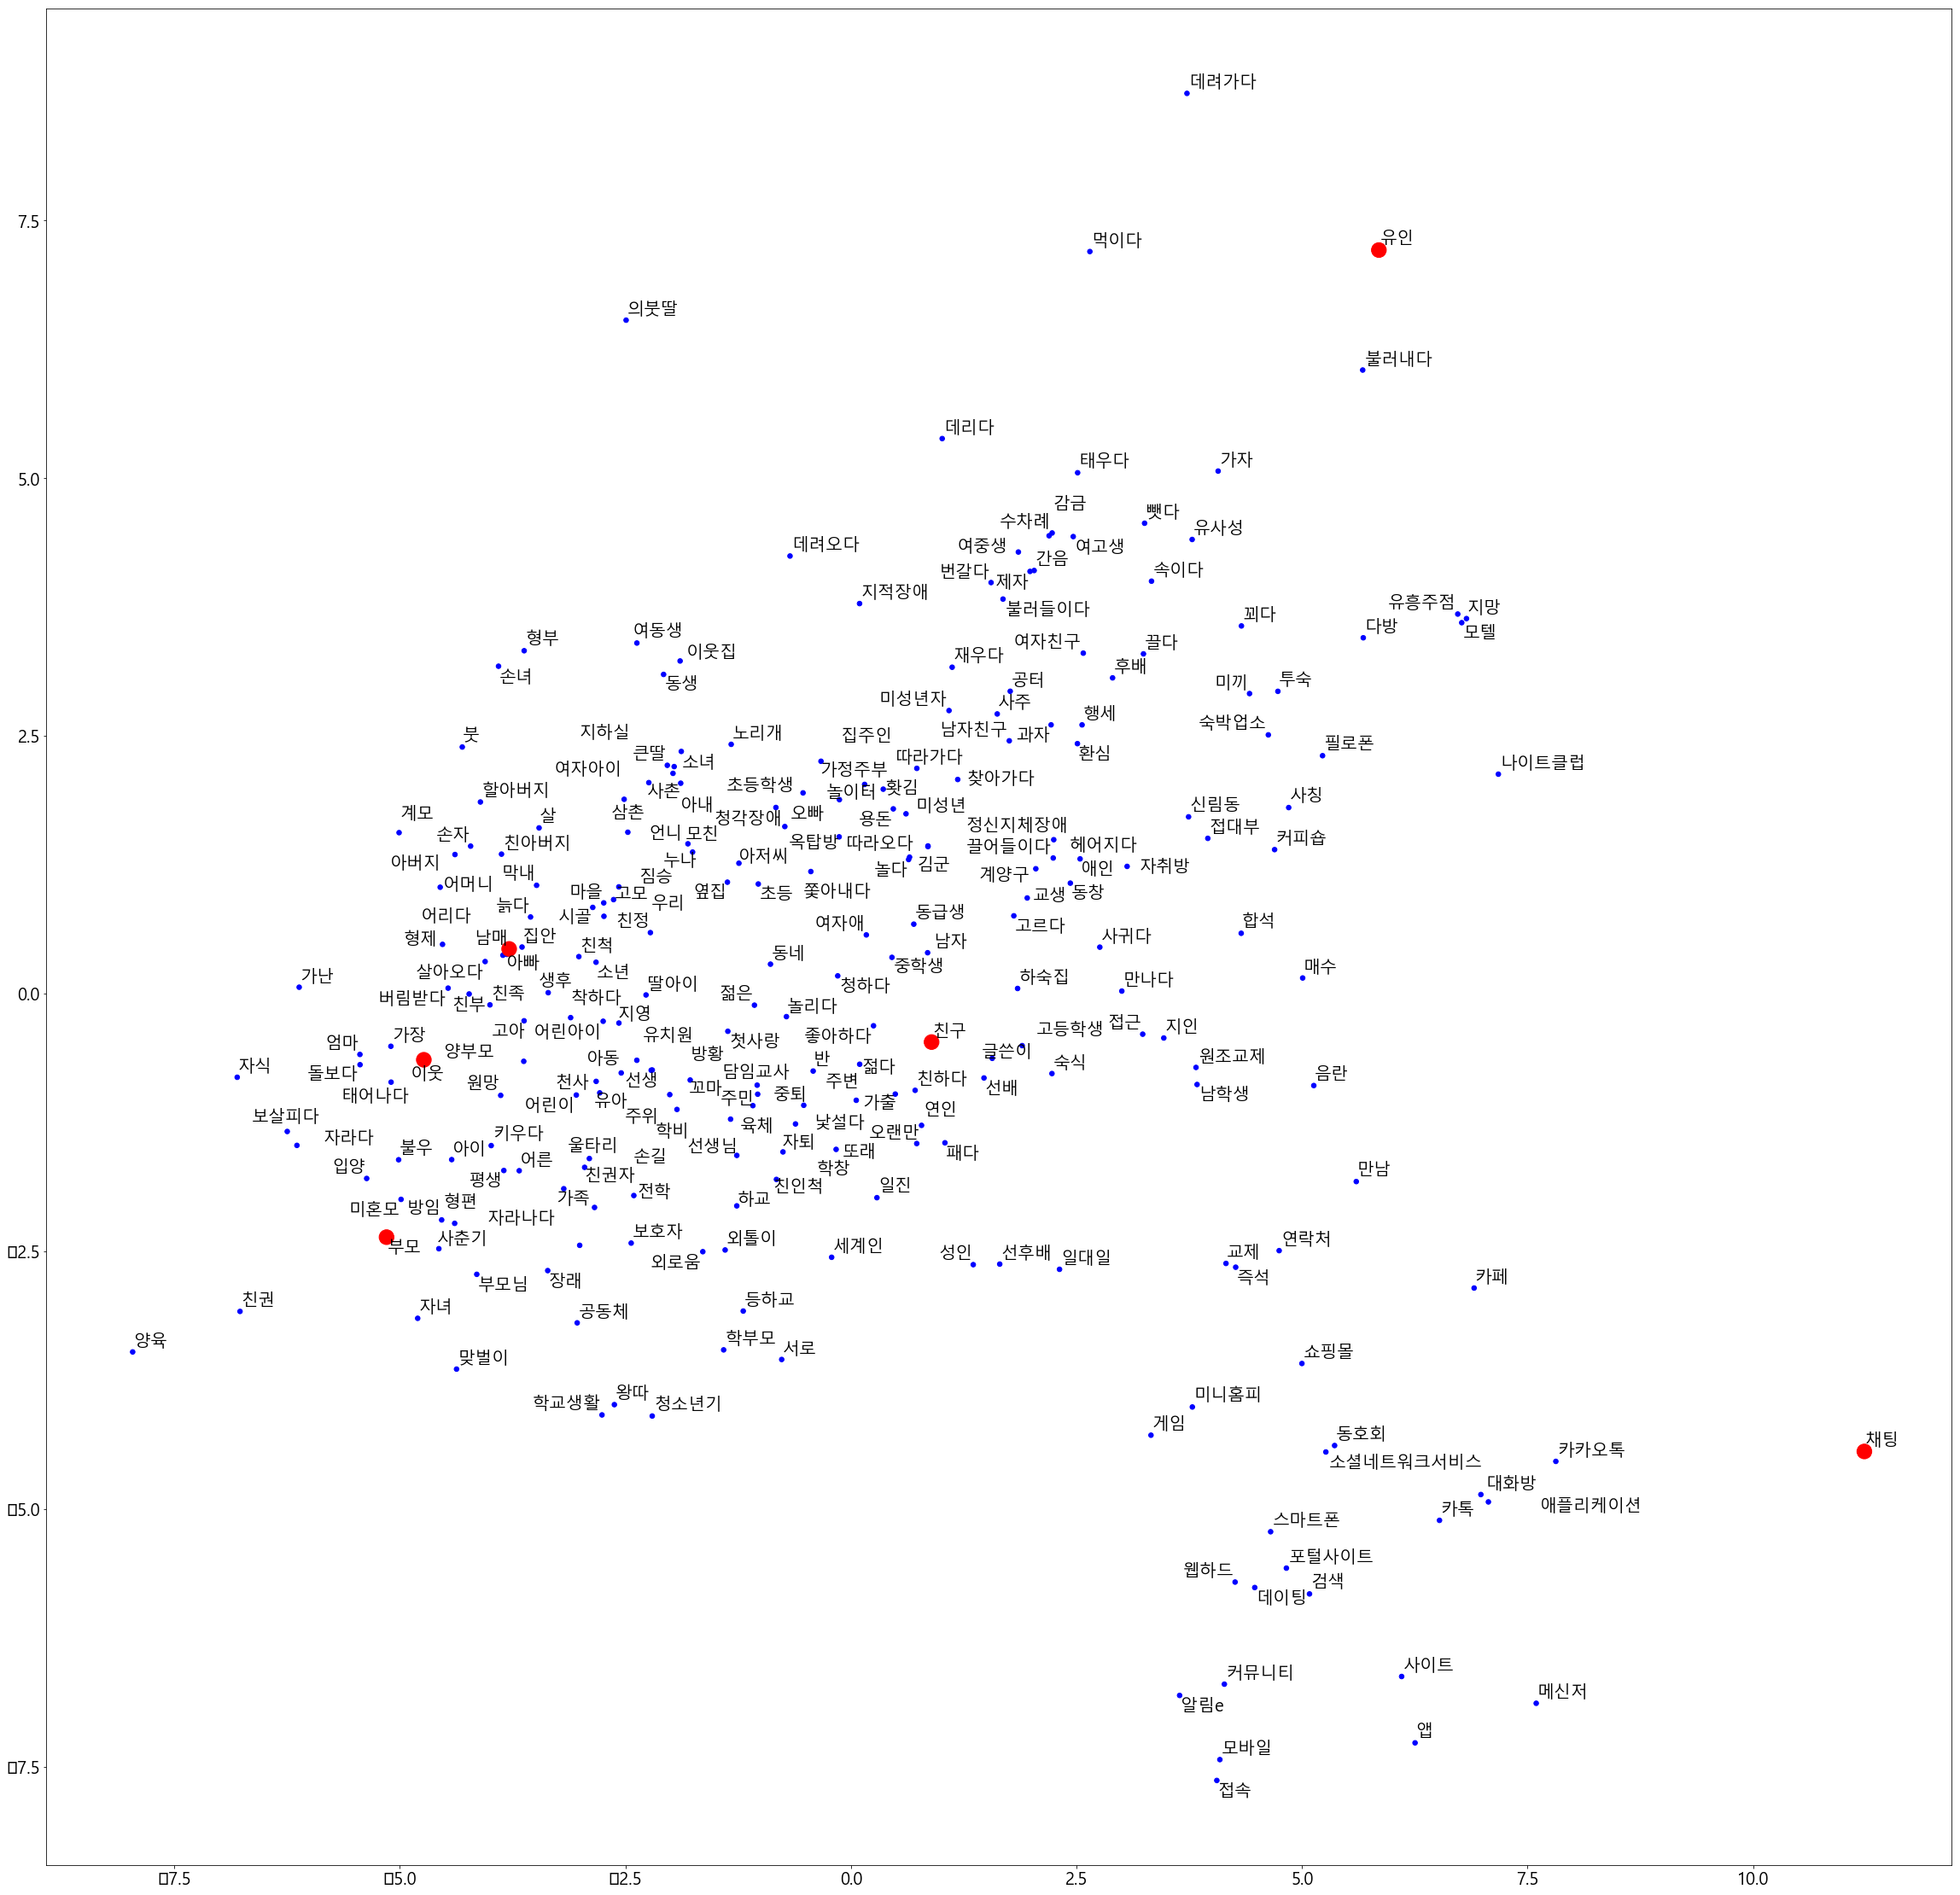

In [181]:
seed = ['친구', '유인', '채팅', '부모', '어리다', '이웃']
words = list(set([j[0] for i in seed for j in model.most_similar(i, topn=50)] + seed))
windex = [words.index(i) for i in seed]
s = [30] * len(words)
c = ['blue'] * len(words)
for i in windex:
    s[i] = 300
    c[i] = 'red'
wordvecs = [model.wv.word_vec(i) for i in words]
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(wordvecs)
X = pca.transform(wordvecs)
xs = X[:, 0]
ys = X[:, 1]
plt.figure(figsize=(40,40))
plt.scatter(xs,ys, s=s, c=c)

from adjustText import adjust_text
rc('font',family=font_name, size=20)
texts = [plt.text(k, v, s) for k, v, s in zip(xs,ys,words)]
adjust_text(texts)

### 3) 사실관계 위주의 서술: 수사와 판결, 통계

위에 언급된 것과 같이 성범죄 사건에 대해서는 선정적이거나 자극적인 묘사, 혹은 동정심을 유발하는 내러티브를 담은 토픽도 있었지만 건조하게 사실관계를 전달하는 토픽들 역시 존재하였다. 이러한 사실관계 위주의 토픽으로 분류된 것들은 다음과 같았다.

In [182]:
topics[[i for i in topics.columns if bool(re.search('10|23|27|43|45|60|64|67|87', i)) and bool(re.search('Prob|FREX', i))]].loc[1:30,]

,10 Prob,10 FREX,23 Prob,23 FREX,27 Prob,27 FREX,43 Prob,43 FREX,45 Prob,45 FREX,60 Prob,60 FREX,64 Prob,64 FREX,67 Prob,67 FREX,87 Prob,87 FREX
1,혐의,검찰,경찰,고소인,가해자,유전자,혐의,재판부,법원,무죄,제도,법안,나타나다,건수,영장,이영,경찰,뜯어내다
2,수사,허위,진술,접대,범인,범인,기소,피고인,재판,판결,개정,개정,지난해,비율,사형,공판,받다,불구속
3,기소,불기소,고소,진술,수사,지문,징역,징역,대법원,국민참여재판,내용,방안,많다,늘어나다,청구,사형,서울,신청
4,받다,기소,사건,소환,경찰,미제,재판부,죄질,사건,유죄,개정안,입법,발생,나타나다,법원,구형,조사,구속영장
5,사건,서울지검,혐의,소장,검거,감식,피해자,이수,판사,판례,방안,제도,높다,집계,구속영장,인멸,지나다,서부경찰서
6,구속,약식,수사,조사,발생,미제사건,형사,실형,무죄,법관,법안,폐지,증가,통계,혐의,학,신청,용산경찰서
7,송치,무고,주장,출석,확인,일치,밝히다,중형,인정,대법관,규정,도입,전체,급증,공판,기각,구속,강남경찰서
8,의견,조사부,밝히다,취하,분석,단서,피고인,집행유예,판단,배심원,관련,현행,분석,추세,열리다,실질,대하다,서울
9,허위,불구속,내용,맞고소,당시,국과수,범행,항소심,변호사,주심,법률,법,따르다,비하다,심사,발부,입건,북부경찰서
10,밝히다,넘기다,당하다,정황,유전자,연쇄,받다,판시,유죄,성립,경우,추진,가운데,감소,기각,심문,밝히다,혐의


10번 토픽의 경우 경찰에서 검찰로 혐의가 넘어간 단계에서 기소와 불기소 여부를 판단하는 과정에 대한 서술을 담고 있다. 23번 토픽의 경우 그 이전 단계에서 경찰이 사건을 수사하고 피해자-가해자의 주장을 밝히는 과정을 담고 있으며, 27번의 경우 미제 사건을 포함한 여러 사건에 대해 경찰 등에서 과학수사를 벌이는 단계에 대한 토픽이다. 43번의 경우 구체적인 혐의에 대해서 재판부가 징역 및 성폭력 교육 이수 등의 판결을 내린 내용을 요약하고 있으며, 45번의 경우 그러한 판결 가운데서도 대법원에서 이뤄지는 상고심과 국민참여재판 결과를 다루고 있다. 60번 토픽은 성범죄 예방과 관련된 법안 및 제도 개정과 관련된 주제를 담고 있으며 64번 토픽의 경우 성범죄 통계에 대해 전달한다. 67번 토픽은 구속영장 발부 및 심사에 대한 것이다. 87번 토픽의 경우 경찰에서의 용의자 체포 및 조사와 관련된 토픽이다.

181

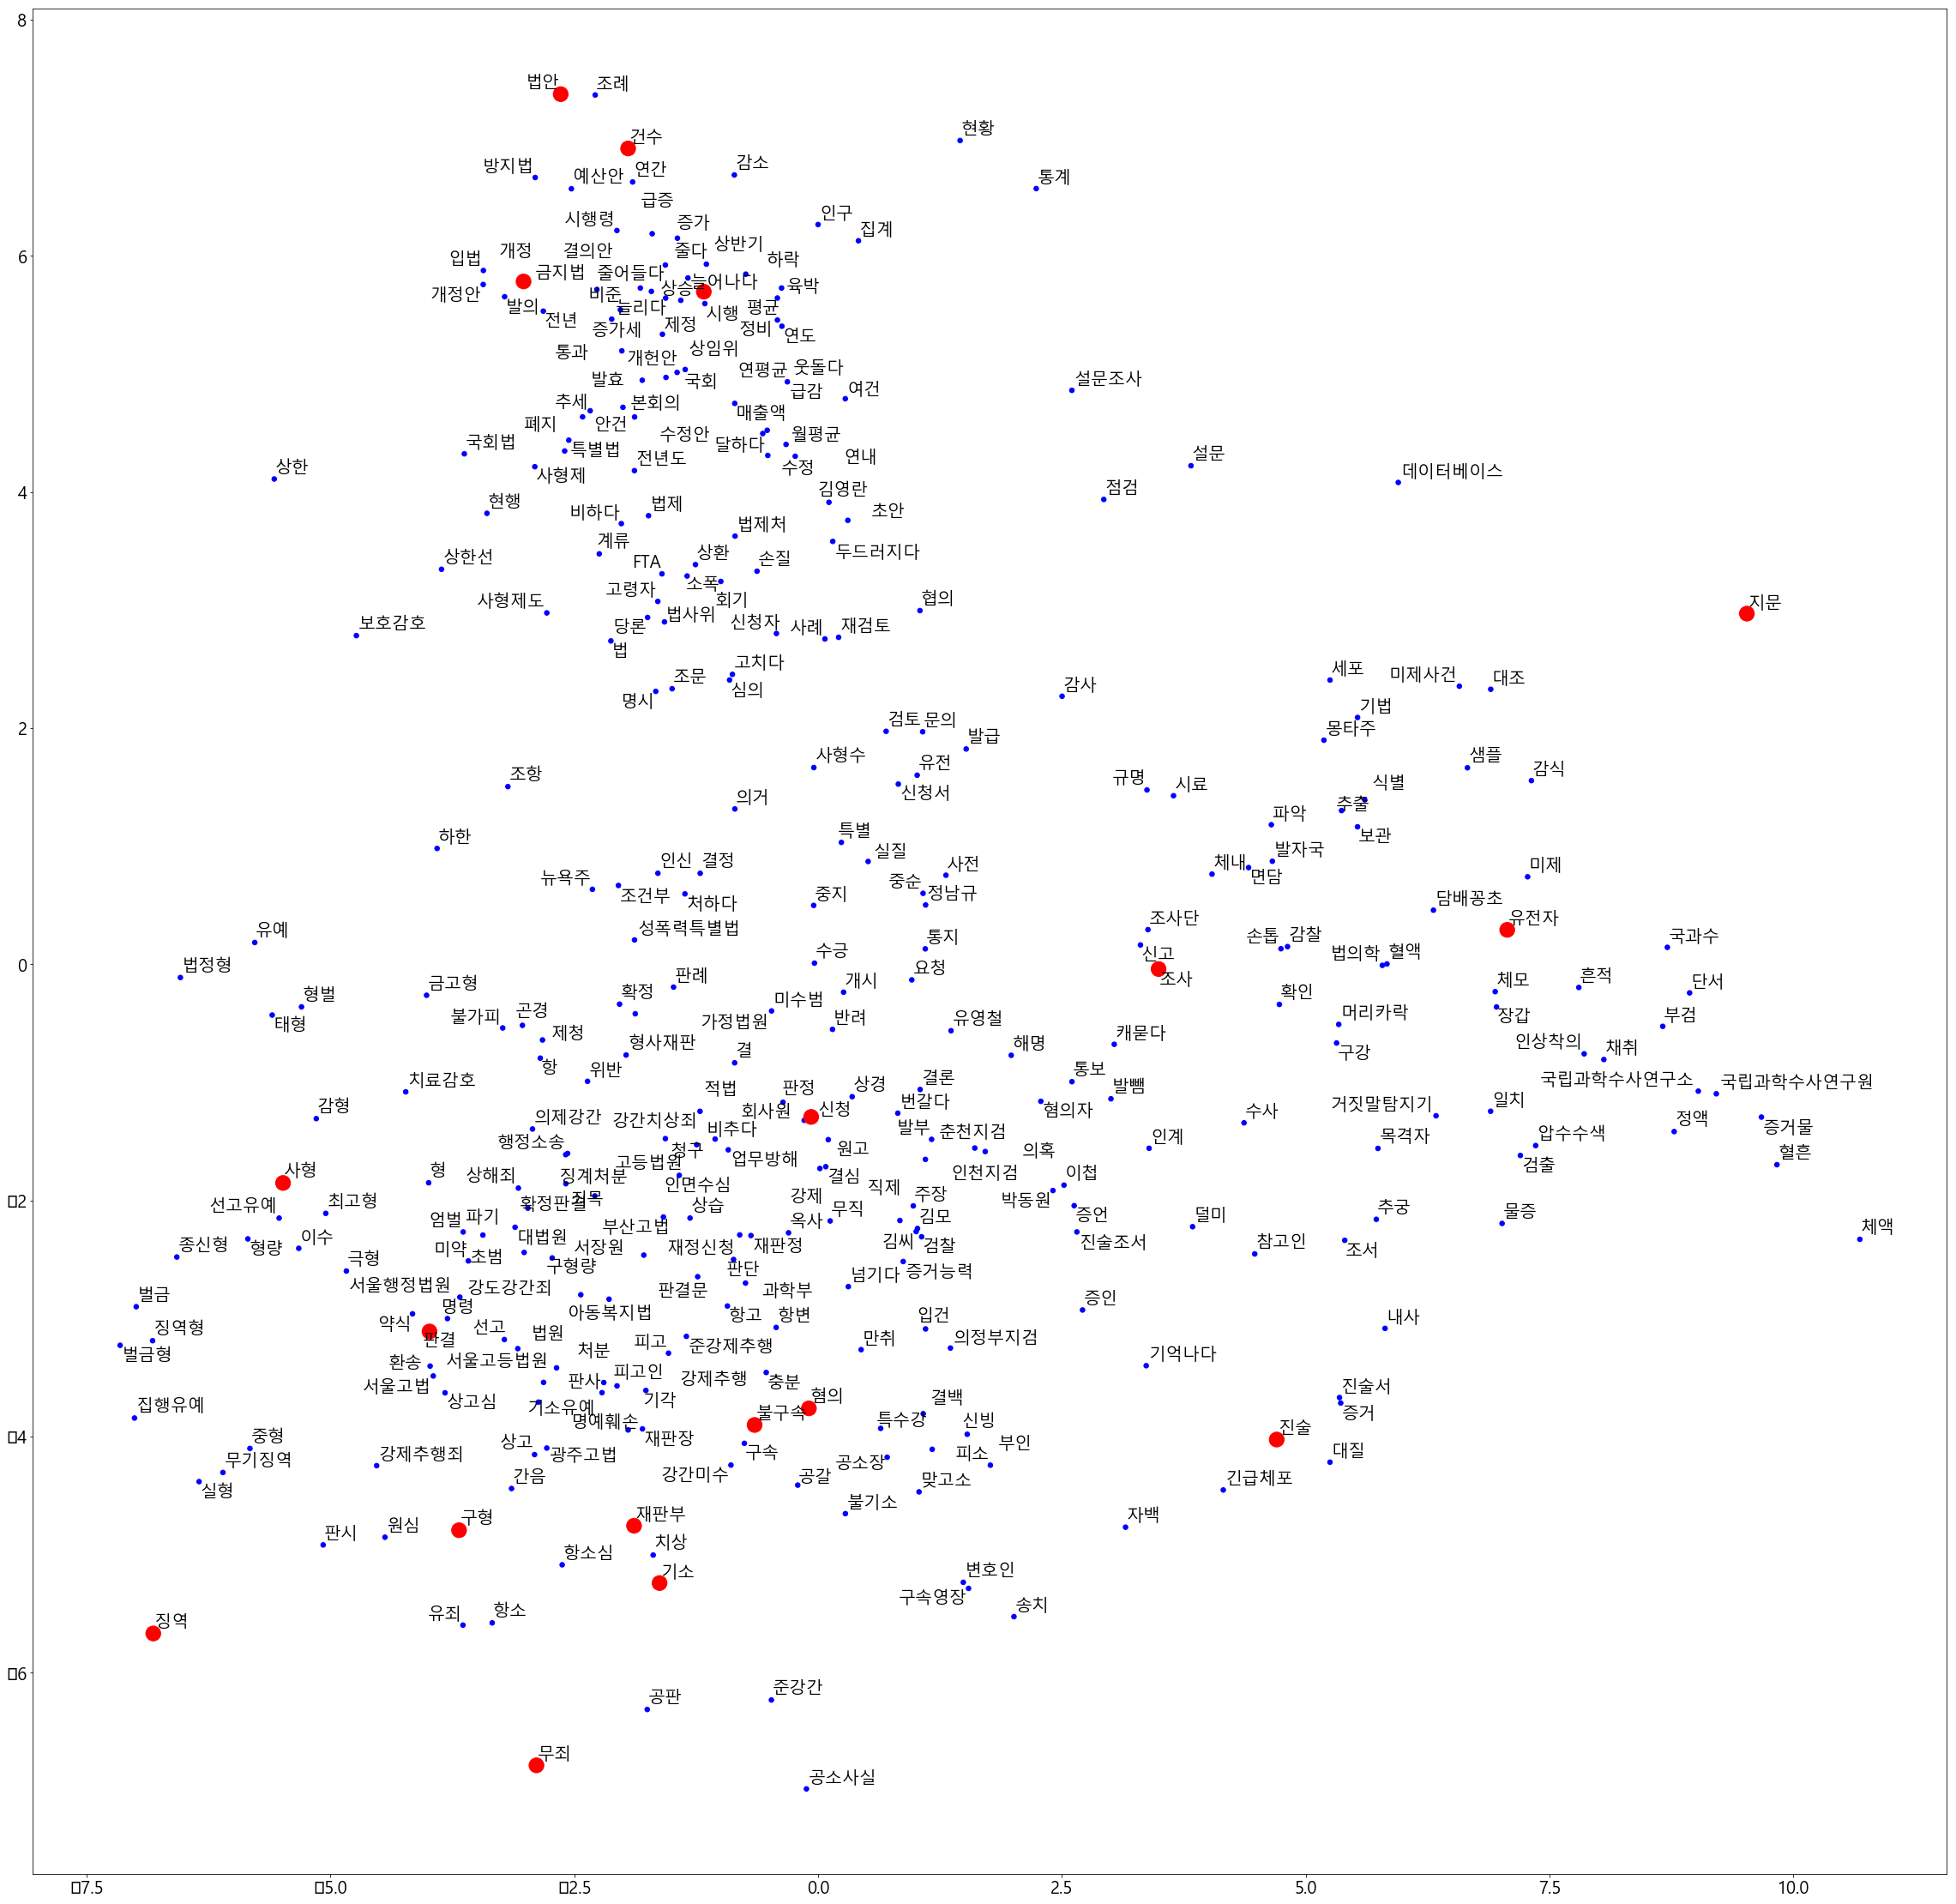

In [186]:
seed = ['혐의', '기소', '조사', '진술', '유전자', '지문', '재판부', '징역', '무죄', '판결', '법안', '개정', '건수', '늘어나다', '사형', '구형', '불구속', '신청' ]
words = list(set([j[0] for i in seed for j in model.most_similar(i, topn=25)] + seed))
windex = [words.index(i) for i in seed]
s = [30] * len(words)
c = ['blue'] * len(words)
for i in windex:
    s[i] = 300
    c[i] = 'red'
wordvecs = [model.wv.word_vec(i) for i in words]
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(wordvecs)
X = pca.transform(wordvecs)
xs = X[:, 0]
ys = X[:, 1]
plt.figure(figsize=(40,40))
plt.scatter(xs,ys, s=s, c=c)

from adjustText import adjust_text
rc('font',family=font_name, size=20)
texts = [plt.text(k, v, s) for k, v, s in zip(xs,ys,words)]
adjust_text(texts)

사실관계 관련 토픽의 핵심 단어들을 중심으로 시각화한 다음의 그림에서 성범죄와 관련한 통계와 법안 이슈가 좌측 상단에 구분된 형태로 배치되어 있고, 성범죄 사건에 대한 '조사'가 개념의 중심에 위치한다. 흥미로운 것은 하단의 우측에서 좌측이 정확히 성범죄와 관련된 사건이 경찰 수사와 검찰 기소를 거쳐 법원의 판결로 이어지는 과정에 부합한다는 것이다. 경찰은 피해자 및 가해자의 진술과 유전자, 지문 등을 동원한 과학수사를 활용해 조사를 진행하고 검찰로 넘어가면서 혐의에 대한 구속 및 불구속 여부가 결정된다. 검찰 이후에 기소가 이뤄지면 사건이 재판부로 넘어가서 판결이 내려지는 일련의 법적 과정이 토픽 분석과 단어 임베딩을 통해 고스란히 드러난 셈이다.

#### 시계열적 변화

위에서 살펴본 성범죄 묘사와 관련된 토픽들을 그래프 형태로 모아서 나타낸 결과는 다음과 같다. 

<img src=https://github.com/ChangdongOh/mediaframe_sexualviolence/blob/master/images/description%20%EC%A0%84%EC%B2%B4.png?raw=true width="800">

자극적 보도 프레임은 일반적인 시기 5% 내외의 점유율을 보이다가 중범죄자들의 범행과 검거가 이뤄지면서 대중의 관심이 집중되었던 시기 두 배 이상 급증하는 경향을 띤다는 점에서 비교적 사건 종속적인 프레임이라 볼 수 있다. 물론 2010년대 중반 들어서 이러한 자극적 보도의 비율이 상대적으로 줄어들고 있다는 점은 긍정적인 흐름이라 볼 수 있으나, 과거와 같은 중범죄 사건이 다시 언론의 주요 보도 대상이 될 경우 이와 같은 보도 행태가 다시 나타날 위험성은 존재한다고 볼 수 있다. 피해자에 대한 내러티브 중심의 묘사의 경우 자극적 보도 프레임보다 다소 낮은 비율을 보이고 있는데, 함께 움직이는 듯 하면서도 일정한 시간차를 두고 비율이 증가하는 모습을 나타냄을 알 수 있다. 이는 충격적인 중범죄 사건 가해자의 검거 이전 단계와 체포, 조사 단계 이후 사건의 전모가 모두 밝혀진 이후에 내러티브 중심의 피해자에 대한 묘사가 나타났기 때문에 발생한 경향으로 보인다. 사실관계에 기반한 보도는 대략 15% 내외의 비율을 보여주고 있는데, 흥미로운 것은 내러티브 중심의 서술과 마찬가지로 자극적 보도 프레임과 유사한 등락폭을 보이고 있다는 점이다. 이는 사회적 이슈가 될만한 강력범죄 사건에 대한 보도량이 늘어나는 과정에서 해당 사건의 경찰 조사와 법적 사실관계에 대한 서술 역시 증가했기 때문일 가능성도 있다. 둘은 반드시 길항적인 관계라고 볼 수는 없으며, 성범죄 대책 및 반응이나 다른 공간 및 배경에서 일어난 사건에 대한 보도 프레임의 비중이 줄어들고 강력범죄 사건에 대한 법적 사실관계를 많이 다뤘다고 볼 여지가 있기 때문이다.

세부적인 방송사별 데이터를 모아서 따로 살펴보면, 방송사들의 보도 행태가 가장 눈에 들어온다. 영상을 통해 비교적 짧은 시간 내에 뉴스를 전달해야 하는 방송 매체의 특성상 더욱 직관적이고 자극적 표현이 많이 들어간다고 볼 수도 있으나, KBS나 SBS의 경우 다른 언론사에 비해 2, 3배 가량 자극적 묘사와 관련된 토픽을 더욱 많이 사용한 것으로 드러났다.

<img src=https://github.com/ChangdongOh/mediaframe_sexualviolence/blob/master/images/description%20KBS.png?raw=true width="400">
<img src=https://github.com/ChangdongOh/mediaframe_sexualviolence/blob/master/images/description%20SBS.png?raw=true width="400">

## 범행 동기와 피해자-가해자 관계에 대한 토픽


### 정신질환과 정신병, 트라우마의 두 이면: 피해자와 가해자

#### 영원히 고통받는 피해자

미디어에서 나타나는 정신질환 및 트라우마, 상처에 대한 서술은 가해자와 피해자 모두의 스테레오타입을 강화하는 방향에 기여할 가능성이 있다. '상처'와 '우울증'이라는 키워드가 성폭력 피해자와 결합했을 때 어떠한 형태의 의미를 형성하는지 살펴보면 이러한 편견을 잘 알 수 있다. 피해자가 사건으로 인해 당한 상처와 고통은 단순한 아픔이 아니라 씻을 수 없는 타격과 손해를 입힌 것으로 간주되며, 그러한 상처는 쉽게 씻어지지 않고 평생 이어지는 것으로 여겨진다. 생존자들이 겪는 우울증에 대한 서술 역시 이러한 서술이 만연한 것을 알 수 있다. 

이러한 '고통받는 생존자'의 이미지는 성폭력 피해자들에게 공감하고 그들의 치유를 도울 수 있는 방향으로 나아갈 수도 있지만, ㅇㅇ(201)은 성범죄 기억과 그로 인한 트라우마를 극복하고 이전의 일상을 회복해서 살아가고 있는 피해자들의 목소리를 지우는 방향으로 기능할 수도 있음을 지적한다. 한국 언론에서 드러난 피해자의 상처나 트라우마, 그리고 이에 대한 피해자들의 인터뷰 상당수가 고통과 상처를 강조하는 데에 초점이 맞춰져 있을 뿐 그들이 어떻게 원래의 삶을 되찾았는지 말하지 않는데, 이는 정상적인 삶을 살아가는 피해자들에게 '너희는 왜 고통받지 않느냐'라는 2차적 낙인을 씌우는 효과까지 낳을 수 있다.

#### 충동에 가득찬 정신질환 가해자

여러 선행 연구들은 가해자의 정신병력과 성적 욕망에 기반한 우발성을 강조하면서 생기는 부작용을 비판하고 있다. 하지만 아래의 분석 결과는 한국 언론의 보도 과정에서 가해자의 정신질환을 강조하고 그들을 일반인과 구분-격리시키고자 하는 담론 구조가 강력하게 자리잡아 있음을 보여준다. 동일한 '상처'라는 단어라도 가해자와 결합할 경우 그 상처는 사회와 주변인들에 대한 원한과 실망감, 저주로 이어진다. 이는 '정신병'이라는 단어와 결합할 때 더욱 명확히 드러나는데, 유영철 및 정남규와 같은 범죄자들의 이름은 해당 벡터와 매우 높은 유사도를 보일 정도로 거의 동일한 것으로 간주되고 있다. 이러한 정신병적 성향은 술(알코올)과 콤플렉스와 같은 요소와 결합하여 가해자의 변태성과 성욕을 더욱 강조하게 된다.

In [45]:
df = pd.DataFrame()
df['상처+피해자-가해자'] = [(i[0], round(i[1], 2)) for i in model.most_similar(['상처', '피해자'], ['가해자'], topn=50)]
df['우울증+피해자-가해자'] = [(i[0], round(i[1], 2)) for i in model.most_similar(['우울증', '피해자'], ['가해자'], topn=50)]
df['트라우마+피해자-가해자'] = [(i[0], round(i[1], 2)) for i in model.most_similar(['트라우마', '피해자'], ['가해자'], topn=50)]
df['상처+가해자-피해자'] = [(i[0], round(i[1], 2)) for i in model.most_similar(['상처', '가해자'], ['피해자'], topn=50)]
df['우울증+가해자-피해자'] = [(i[0], round(i[1], 2)) for i in model.most_similar(['우울증', '가해자'], ['피해자'], topn=50)]
df['정신병+가해자-피해자'] = [(i[0], round(i[1], 2)) for i in model.most_similar(['정신병', '가해자'], ['피해자'], topn=50)]
df

,상처+피해자-가해자,우울증+피해자-가해자,트라우마+피해자-가해자,상처+가해자-피해자,우울증+가해자-피해자,정신병+가해자-피해자
0,"(고통, 0.4)","(불면증, 0.44)","(후유증, 0.44)","(중상, 0.32)","(증상, 0.39)","(정신질환, 0.38)"
1,"(피해, 0.35)","(후유증, 0.43)","(고통, 0.39)","(범인, 0.32)","(불면증, 0.39)","(소아기호증, 0.33)"
2,"(트라우마, 0.35)","(증상, 0.43)","(우울증, 0.36)","(부상, 0.28)","(증후군, 0.39)","(유영철, 0.33)"
3,"(아픔, 0.33)","(정신질환, 0.41)","(아픔, 0.36)","(화상, 0.27)","(정신질환, 0.35)","(사이코패스, 0.33)"
4,"(육체적, 0.32)","(질환, 0.38)","(외상, 0.35)","(속죄, 0.26)","(증세, 0.35)","(증후군, 0.33)"
5,"(후유증, 0.31)","(질병, 0.38)","(괴로움, 0.35)","(아픔, 0.25)","(스트레스, 0.35)","(정신병원, 0.32)"
6,"(괴로움, 0.31)","(스트레스, 0.38)","(상처, 0.34)","(고통, 0.25)","(정신병, 0.34)","(살인마, 0.32)"
7,"(아프다, 0.31)","(우울, 0.37)","(육체적, 0.34)","(트라우마, 0.25)","(우울, 0.34)","(범인, 0.32)"
8,"(타격, 0.3)","(증후군, 0.36)","(정신적, 0.34)","(주범, 0.24)","(후유증, 0.31)","(살인자, 0.31)"
9,"(정신적, 0.3)","(트라우마, 0.36)","(질병, 0.32)","(상해, 0.23)","(만성, 0.31)","(중독자, 0.3)"


## 범행 사실에 대한 축소 및 비유적 표현 사용

자극적인 보도 역시 문제이지만, 구체적인 가해자의 범죄 사실을 적시하지 않고 우회적이고 완곡한 표현을 사용하며 그 심각성을 축소하는 보도 역시 문제라고 볼 수 있다. 이러한 경향은 주로 친족간의 범죄를 묘사할 때 두드러지게 나타난다. '몹쓸'이라는 단어가 어떤 방식으로 사용되고 있는지 살펴보면 그러한 경향을 명확하게 파악할 수 있다.

In [112]:
model.most_similar('몹쓸', topn=30)

[('못되다', 0.5607600212097168),
 ('인면수심', 0.42327988147735596),
 ('짐승', 0.38126400113105774),
 ('파렴치한', 0.35331061482429504),
 ('손녀', 0.3436175584793091),
 ('저런', 0.3428458869457245),
 ('나쁘다', 0.32551074028015137),
 ('큰아버지', 0.324219286441803),
 ('번갈다', 0.3239235579967499),
 ('저지르다', 0.30812305212020874),
 ('똑같다', 0.3076886534690857),
 ('친아버지', 0.30700239539146423),
 ('술취', 0.30203190445899963),
 ('바보', 0.301791787147522),
 ('봉변', 0.2990952730178833),
 ('변태', 0.29186883568763733),
 ('여자아이', 0.2898423671722412),
 ('성폭행', 0.2864527404308319),
 ('삼촌', 0.2853586673736572),
 ('공주', 0.2822490334510803),
 ('다름없다', 0.27542728185653687),
 ('자위행위', 0.27504611015319824),
 ('꾀다', 0.2705424427986145),
 ('여자애', 0.26960039138793945),
 ('의붓아버지', 0.266548216342926),
 ('그런', 0.2664276957511902),
 ('큰딸', 0.2661021053791046),
 ('할아버지', 0.265234112739563),
 ('이웃집', 0.265178382396698),
 ('엽기', 0.26261451840400696)]

## 스테레오타입에 부합하는 피해자와 그렇지 않은 피해자: 누가 보호받아야 하는 여성인가?

성범죄 보도 가이드라인에서 지적하고 있듯, 성범죄는 피해자의 직업이나 옷차림 등으로부터 기인한 것이 아니며 피해자가 그로 인한 도덕적 비난을 받아야 할 이유도 없다. 그러나 여성에 대한 직업적 스테레오타이핑에서 드러나듯 언론 보도에서는 이러한 피해자에 대한 상반된 형태의 접근이 분명 등장하고 있다. 연구자들은 이러한 피해자에 대한 시각 차이를 그들이 처한 '공간'을 비교함으로서 더욱 명확히 할 수 있다고 보았다.

### 술집과 캠퍼스: 헤픈 여성들과 보호받아 마땅한 여성들

상당수의 성범죄 사건이 발생하는 배경은 클럽, 주점, 나이트클럽 등 주류를 제공하는 업소들이다. 가부장적 문화와 사회적 규범 속에서 피해자들은 이러한 공간에서 피의자와 어울리고, 함께 술을 마시며 취했다는 것만으로도 문란하거나 일탈을 저지른 것으로 여겨지며 사건의 원인을 제공한 것으로 치부되곤 한다. 연구자들은 공간으로서의 대학이 이와 명확한 대비를 보여줄 수 있는 공간이라 보았다. 동일한 성년의 여성이라 해도 '여대생'이 미래의 사회인이자 매력적인 여성으로 소비되는 반면, 여성들, 심지어 그 여대생들조차도 술집이나 클럽과 같은 공간에서는 유흥과 탈선을 즐기고 부도덕한 삶을 살아가는 모습으로 그려진다.

연구자들은 '대학'이나 '대학교'의 경우 해당 단어를 직접 여성 및 피해자와 결합할 경우 대학 이름과 학과 이름 등이 지나치게 많이 등장하기 때문에 타당한 비교가 어렵다고 판단하여, '대학'의 유사 단어 가운데 대학 이름과 단과대 및 대학 종류와 연관된 단어를 제외하고 대학 내부의 구체적 공간이라 할 수 있는 '캠퍼스'(유사도 0.42)와 '학내'(유사도 0.37)를 대신 활용하였다. 유사 단어들을 추려내는 과정에서도 '고려대' '서강대' 등의 구체적인 대학 이름이나 술집과 유사한 공간으로 분류될 수 있는 다른 유사 개념들은 제외한 다음 피해자 및 여성과 연관된 주체와 행동을 나타낼 수 있는 어휘만을 남겼다.

In [7]:
df = pd.DataFrame()
pd.set_option('display.max_rows', 100)

df['피해자+캠퍼스-술집'] = [(i[0], round(i[1], 2)) for i in model.most_similar(['피해자', '캠퍼스'], ['술집'], topn=100)
                   if i[0] not in ['서강대', '의과대학', '공대']][0:20]
df['피해자+술집-캠퍼스'] = [(i[0], round(i[1], 2)) for i in model.most_similar(['피해자', '술집'], ['캠퍼스'], topn=100)
                   if i[0] not in ['술집', '식당', '주점', '노래방', '음식점', '유흥주점', '모텔']][0:20]
df['여자+학내-술집'] = [(i[0], round(i[1], 2)) for i in model.most_similar(['여자', '학내'], ['술집'], topn=100)
                   if i[0] not in ['고려대학교', '고려대', '서울대학교', '부산대']][0:20]
df['여자+술집-학내'] = [(i[0], round(i[1], 2)) for i in model.most_similar(['여자', '술집'], ['학내'], topn=100)
                   if i[0] not in ['나이트클럽', '커피숍', '식당', '유흥주점', '노래방', '다방', '편의점', '목욕탕', '음식점',
                                  '찜질방', '수영장', '모텔', '주점', '사우나', '레스토랑', '룸살롱', '부평구']][0:20]
df

,피해자+캠퍼스-술집,피해자+술집-캠퍼스,여자+학내-술집,여자+술집-학내
0,"(학내, 0.35)","(피해, 0.29)","(총학생회, 0.27)","(남자, 0.39)"
1,"(희생자, 0.28)","(피고인, 0.28)","(여학생, 0.27)","(접대부, 0.39)"
2,"(상담소, 0.26)","(여주인, 0.27)","(공론, 0.25)","(아가씨, 0.37)"
3,"(종식, 0.24)","(당사자, 0.26)","(여자아이, 0.24)","(마담, 0.36)"
4,"(총학생회, 0.24)","(일행, 0.26)","(학칙, 0.24)","(여자애, 0.34)"
5,"(대책위, 0.22)","(증인, 0.25)","(교내, 0.24)","(합석, 0.34)"
6,"(영이, 0.22)","(술값, 0.24)","(사내, 0.24)","(요새, 0.34)"
7,"(아동, 0.22)","(고소인, 0.24)","(운동선수, 0.23)","(술취, 0.33)"
8,"(핫라인, 0.22)","(참고인, 0.24)","(재학생, 0.23)","(술값, 0.33)"
9,"(예방, 0.22)","(목격자, 0.24)","(학생회, 0.23)","(일행, 0.33)"


### 각기 다른 피해의 언어: '공적 언어'로 말할 수 있는 사람들과 그러지 못하는 사람들

'술집'이나 '주점'이라는 배경 속에서 여성은 성적 대상이나 착취의 대상으로 언급된다. 언론 기사임에도 불구하고 피해자 여성들은 '창녀'나 '처녀', '접대부'와 같은 표현이나 '이쁘다'와 같은 표현을 통해 대상화된다. 그러나 같은 주체가 술집 대신 '캠퍼스'나 '학내'라는 공간적 배경으로 옮겨왔을 때 프레이밍되는 방식은 사뭇 다르다. 술집에서 '반말'을 듣거나 '동석' 요구에 '응하기'를 요구받는 피해자들과는 달리 대학에서 피해자들은 그들의 피해에 대한 다양한 상담 지원을 받게 된다. 동시에 그러한 피해가 발생한 원인을 근절하기 위한 캠퍼스 내부에 만연한 분위기와 문화를 근절하기 위한 캠페인 역시 제시된다. '여자'와 '학내'라는 단어를 사용했을 때에도 이와 거의 유사한 패턴이 나타난다. 술집에서 여자들이 마담이나 창녀, 접대부로 술자리에 동석-합석하며 춤추는 존재로 표상되는 반면 그들이 학내로 옮겨왔을 때 연관되는 단어들은 '공론'이나 '인권', 그리고 '남녀', '여성주의'와 같은 성범죄와 연관된 구조적 개념들과 학생회, 졸업생 등 그들을 위해 싸워주고 연대할 수 있는 주체들이다.

## '짐승'이라는 메타포가 사용되는 방식:

다음 기사를 참조해 보자.

In [90]:
data[data['pos'].str.contains('초식동물')].reset_index(drop=True)['article'][2][:300]

'\n\n\n\n\n\n\n\n\n\n “우리 집 강아지가 아픈데 한번 봐 줄래?” 집 근처 편의점 앞에서 만난 30대 후반의 아저씨가 건넨 말에 10세, 8세의 두 여자 어린이는 아무 의심 없이 그의 집으로 따라갔다. 이후 그는 마치 맹수가 어린 초식동물을 덮치듯이 두 어린이에게 성폭력을 가했다. 실종된 두 어린이는 두 달 반 뒤 싸늘한 시신으로 발견됐다. 꼭 2년 전인 2008년 3월 초 우리 사회를 떠들썩하게 했던 김양  초등생 살해사건이다. 우연의 일치일까. 1994년 미국 뉴저지 주 해밀턴 타운십에 살던 7세 여자 어린이 메건 캔카는 “강아지'

In [35]:
model.most_similar(['짐승', '가해자'], ['피해자'], topn=50)

[('악마', 0.4161047637462616),
 ('살인마', 0.399512380361557),
 ('살인자', 0.39596661925315857),
 ('범인', 0.3791041374206543),
 ('죽이다', 0.32795417308807373),
 ('사냥', 0.3210808038711548),
 ('물고기', 0.314571738243103),
 ('악질', 0.3130125105381012),
 ('인면수심', 0.3115023970603943),
 ('죄인', 0.3071918487548828),
 ('달려들다', 0.3068543076515198),
 ('연쇄살인범', 0.3031284809112549),
 ('울부짖다', 0.29905712604522705),
 ('야만', 0.29889070987701416),
 ('저런', 0.29705965518951416),
 ('바보', 0.2964283525943756),
 ('범죄자', 0.296406090259552),
 ('엽기', 0.2952873110771179),
 ('강력범', 0.295010507106781),
 ('변태', 0.29206281900405884),
 ('본성', 0.29090625047683716),
 ('강간범', 0.2891733646392822),
 ('창녀', 0.2884049713611603),
 ('파렴치한', 0.2860865294933319),
 ('주범', 0.2855912446975708),
 ('저주', 0.28540587425231934),
 ('거칠다', 0.2824602723121643),
 ('살해범', 0.2821112871170044),
 ('쥐', 0.2806244492530823),
 ('광기', 0.27857890725135803),
 ('못되다', 0.27606716752052307),
 ('멱살', 0.275505393743515),
 ('탈옥', 0.2744743227958679),
 ('흉악범', 0.2719216

'짐승'이라는 표현은 '괴물'이나 '사냥'과 같은 동물 메타포와 연관된 단어들과 연관성을 가지나 동시에 '악마'와 같은 피의자를 악마화하고 낙인 찍는 형태의 수식어나 '사이코패스'와 같은 구체적인 가해자의 정신 질환을 의심하는 표현으로도 이어진다.이러한 레토릭은 '어린아이'라는 단어와의 연관성에서 알 수 있듯 주로 아동이나 청소년 대상 성범죄에서 나타나며, '착하다'는 표현을 통해 피해자와의 대비를 더욱 강하게 드러내는 방식이 활용됨을 알 수 있다. '소리치다', '애원'하다와 같은 단어 역시 피해자의 절박함과 가해자의 잔인성을 대비하면서 내러티브를 형성하는 과정이라 할 수 있으며, 가해자는 이러한 피해자를 향해 '울부짖다'거나 '잡아먹다', '달려들다'와 같은 행위를 가하는 당사자가 된다.

## 엄벌주의와 사회적 구조의 문제

![solutions](https://github.com/ChangdongOh/mediaframe_sexualviolence/blob/master/images/solutions%20%EC%A0%84%EC%B2%B4.png?raw=true)

성폭력 사건에 대한 반응 및 대책 가운데 가해자에 대한 처벌과 공분에 초점이 맞춰진 토픽과 사회적 구조와 피해자를 위한 예방 교육, 치안 강화 등을 중심으로 한 토픽으로 분류한 다음 그 변화를 살펴본 결과는 위와 같다. 2010년대 즈음 가해자 처벌 담론이 언론을 통해 널리 재생산되었으나 그 이후 감소하는 경향을 보이는 반면, 성범죄를 만드는 사회 구조와 교육 및 피해자 지원 사업 등에 대한 담론이 2010년대 중반 이후 가파르게 다시 상승하는 모습을 보이고 있다.

## 코드 재작업 필요: 직업 구도에서 나타나는 성녀-창녀 이분법

'여자'와 '여성' 키워드로 유사 단어들을 살펴보았을 때 흥미로운 이분법을 발견할 수 있다. '여자'라는 키워드로 지칭될 때 여전히 다수의 여성들은 '여'자가 붙은 승무원, 배우, 사원으로 일컬어지거나 학생으로 지칭되긴 하지만, 일부 여성들이 창녀나 접대부, 포주와 같은 표현을 통해 분리되어 다뤄진다. 이는 문어체적 표현인 '여성'이나 피해자 일반을 다룰 때에는 다소 완화되기는 하나 여성을 지칭하는 거의 모든 직업에만 '여'자가 붙어서 지칭된다는 점은 여기서도 변하지 않는다.

'남자'나 '남성'의 경우 사뭇 다른 패턴이 나타난다. 남성 개인의 직업을 지칭하는 경우도 있지만, 피의자가 남성일 경우 범죄의 목표가 되었던 여성들의 직업 역시 상당히 높은 비중을 차지하기 때문이다. 특히 '남자'라는 키워드로 접근했을 때 키워드의 절반 이상은 남자가 아닌 창녀, 마담, 여선생, 여고생, 여사원 등 여성의 직업을 지칭하는 단어들이 차지했다. 이는 성범죄 보도 기사에서 '남자'라는 단어가 쓰일 때조차도 범죄 남성의 직업보다 그 남성의 목표 여성의 직업 정보가 더욱 많이 등장했음을 의미한다. '남성'이라는 표현에서도 이와 유사하게 '매춘부'나 '여고생', '여직원', '댄서'와 '방송작가'가 등장한다.

## 피의자와 피해자, 그리고 익명의 일반인 언급 상황

연구자는 젠더와 직접적으로 관련되어 있지 않는 표현인 '피해자'와 '피의자'에서도 이러한 직업적 차이가 나타나는지 살펴보았다. 언론 보도에서 피해자 및 가해자의 직업 정보를 '가해자인 회사원 김모 씨'나 '피해자 김모 씨(회사원)'와 같은 형태로 표현하는 점을 감안하여, 익명의 인물을 나타내는 표현인 'ㅇ모 씨'에서 피해자 단어 벡터를 더하고 피의자 단어 벡터를 뺀 것과 반대의 연산을 수행한 결과를 함께 살펴보았다.

분석 결과 '피해자'라는 단어와 밀접하게 연관되어 함께 등장한 단어는 학생이나 여교사, 교사, 여직원 등 학교와 연관된 직업이 한 축을 이루고, '여군'을 필두로 소령이나 대위, 대령 등 군대와 관련된 직위들이 다른 한 축을 이룬다는 것을 알 수 있다. 흥미로운 것은 가해자의 입장인 '대령'이나 '상사' 등의 영관급 장교 및 연차가 높은 군 간부들이 가해의 대상으로 언급되면서 '하사'와 같은 하급 간부들이 아니라 '이병'이라는 남성 사병 역시 피해자로 언급되고 있다는 점이다. '형사'와 '여경', '수사관' 등 군대와 유사하게 계급과 직함을 지닌 경찰 역시 높은 유사도를 보였다. 

반면 'ㅇ모 씨'라는 익명 표현을 경유해서 드러나는 피해자의 직업적 이미지는 조금 더 일반적인 여성 직업을 대표한다. 피팅모델이나 여비서, 항공기의 승무원과 간호사, 간호조무사나 아르바이트생, 여배우, 대학원생과 유학생 등 다양한 직업군이 높은 유사도를 보였다. 

이와 같은 패턴은 피의자와 피의자에 대한 익명화된 언급에서도 비슷한 경향을 보인다. '피의자' 단어 벡터는 대령이나 형사, 경정, 경사 등 군대와 경찰의 정형화된 계급 체계에서 부여된 직함과 밀접하게 연관되어 있으나 언급되는 계급이 장성급 등으로 더욱 높아지는 경향(사단장, 여단장, 원사)이 보인다. 반면 익명화된 일반인 호명 과정에서는 군이나 경찰과 관련된 직함은 사라지고 외교관, 치과의사나 교수와 같은 전문직부터 건설업자나 회사원, 경찰관, 참사관, 그리고 공익요원과 휴학생, 무직에 이르기까지 매우 다양한 직업 스펙트럼을 보여준다. 

### 피의자는 건설업자, 여자는 미용사?

성범죄 관련 보도를 '여성-남성'과 '피의자-피해자' 구조로 살펴보았을 때 발견할 수 있는 것은 남성 피의자의 직업 정보가 '피의자'라는 단어를 매개로 나타나는 반면, 여성 피해자의 정보는 언제나 '여성'을 통해 언급된다는 것이다. 이는 남성이 굳이 '남성'이라는 호명 없이도 직업 이름 하나만으로 그의 공적 지위나 정체성을 확립할 수 있는 반면, 여성의 경우 언제나 직업적 정체성 앞에 '여자'나 '여성'이 붙어야 하며, 심지어 '여사원', '여학생', 여직원', '여승무원'과 같이 직업 이름 앞에도 언제나 '여'가 붙어야만 하기 때문이라 할 수 있을 것이다.